In [1]:
# reff : https://www.kaggle.com/code/adhittio/jpx-stock-analysis-prediction/edit

In this notebook we will be looking at data from the stock market, particularly some technology stocks. We will learn how to use pandas to get stock information, visualize different aspects of it, and finally we will look at a few ways of analyzing the risk of a stock, based on its previous performance history. We will also be predicting future stock prices through a Long Short Term Memory (LSTM) method!

We'll be answering the following questions along the way:

    1.) What was the change in price of the stock over time?
    2.) What was the daily return of the stock on average?
    3.) What was the moving average of the various stocks?
    4.) What was the correlation between different stocks'?
    5.) How much value do we put at risk by investing in a particular stock?
    6.) How can we attempt to predict future stock behavior? (Predicting the closing price stock price of APPLE inc using LSTM)
   

# 1. What was the change in price of the stock overtime?

In this section we'll go over how to handle requesting stock information with pandas, and how to analyze basic attributes of a stock.

In [2]:
#!pip install -q hvplot
# !pip install --upgrade pandas
#!pip install --upgrade pandas-datareader
!pip install -q yfinance


In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import pandas_datareader.data as web
import yfinance as yf

from keras.models import Sequential
from keras.layers import Dense, LSTM
# For time stamps

from datetime import datetime


## TOP STOCK INDONESIA

In [4]:
start = datetime(2020,5,22)
end = datetime.now()  #
#end =datetime(2022, 5, 20)

#saham_BANK = ["USDT-USD"]  #"KAEF.JK"#"BBNI.JK" #"IDRUSD=X"
company=[]
i=0
for clist in ['TPIA','HMSP','UNVR','ASII','TLKM','INDF','BBCA','BMRI','BBRI','EMTK','BRIS']:
    #print(clist)
    B = web.DataReader([clist+'.JK'], 'yahoo', start, end)
    B=pd.DataFrame(B.to_records())
    B.columns=['Date','Adj Close','Close','High','Low','Open','Volume']
    B["company_name"]=clist
    if i ==0 :
        company=B    
    else:
        company=company.append(B)    
    i+=1
    
company=company.set_index('Date')

TPIA=company[company['company_name']=='TPIA']
HMSP=company[company['company_name']=='HMSP']
UNVR=company[company['company_name']=='UNVR']
ASII=company[company['company_name']=='ASII']
INDF=company[company['company_name']=='INDF']

BBCA=company[company['company_name']=='BBCA']
BBRI=company[company['company_name']=='BBRI']
BMRI=company[company['company_name']=='BMRI']

TLKM=company[company['company_name']=='TLKM']
EMTK=company[company['company_name']=='EMTK']
BRIS=company[company['company_name']=='BRIS']

company_list=[TPIA,HMSP,UNVR,ASII,TLKM,INDF,BBCA,BMRI,BBRI,EMTK,BRIS]
tech_list=['TPIA.JK','HMSP.JK','UNVR.JK','ASII.JK','TLKM.JK','INDF.JK','BBCA.JK','BMRI.JK','BBRI.JK','EMTK.JK','BRIS.JK']
company_name=['TPIA','HMSP','UNVR','ASII','TLKM','INDF','BBCA','BMRI','BBRI','EMTK','BRIS']

company

df=company.copy()

print(df.groupby('company_name').size())
display('df.describe()',df.describe())
df.info()

company_name
ASII    487
BBCA    487
BBRI    487
BMRI    487
BRIS    487
EMTK    487
HMSP    487
INDF    487
TLKM    487
TPIA    487
UNVR    487
dtype: int64


'df.describe()'

Adj Close         Close          High           Low          Open  \
count   5357.000000   5357.000000   5357.000000   5357.000000   5357.000000   
mean    4602.001490   4731.062760   4797.370267   4670.291714   4737.587087   
std     2417.484870   2473.054461   2495.700319   2447.737126   2475.609189   
min      290.000000    290.000000    300.000000    274.000000    290.000000   
25%     2460.000000   2490.000000   2570.000000   2430.000000   2500.000000   
50%     4638.055176   4840.000000   4920.000000   4760.000000   4840.000000   
75%     6391.536133   6575.000000   6650.000000   6500.000000   6600.000000   
max    11172.801758  11275.000000  11350.000000  11200.000000  11275.000000   

             Volume  
count  5.357000e+03  
mean   6.537194e+07  
std    8.780283e+07  
min    0.000000e+00  
25%    1.297520e+07  
50%    3.840340e+07  
75%    8.459750e+07  
max    1.318652e+09

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5357 entries, 2020-05-26 to 2022-05-30
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Adj Close     5357 non-null   float64
 1   Close         5357 non-null   float64
 2   High          5357 non-null   float64
 3   Low           5357 non-null   float64
 4   Open          5357 non-null   float64
 5   Volume        5357 non-null   float64
 6   company_name  5357 non-null   object 
dtypes: float64(6), object(1)
memory usage: 334.8+ KB


## CRYPTOCURRENCIES

## BLUECHIP

start = datetime(2020,5,22)
#end = datetime.now()  #
end =datetime(2022, 5, 20)

company=[]
i=0
for clist in ['FB','TSLA','AAPL','NDX','AMZN','MSFT','NVDA','BABA','GOOGL']:
#for clist in ['NFLX','NIO','BA','AMD','DIS','INTC','KO','PFE','MRNA']:
    
    #print(clist)
    B = web.DataReader([clist], 'yahoo', start, end)
    B=pd.DataFrame(B.to_records())
    B.columns=['Date','Adj Close','Close','High','Low','Open','Volume']
    B["company_name"]=clist
    if i ==0 :
        company=B    
    else:
        company=company.append(B)    
    i+=1
    
company=company.set_index('Date')

FB=company[company['company_name']=='FB']
TSLA=company[company['company_name']=='TSLA']
AAPL=company[company['company_name']=='AAPL']
NDX=company[company['company_name']=='NDX']
AMZN=company[company['company_name']=='AMZN']
MSFT=company[company['company_name']=='MSFT']

NVDA=company[company['company_name']=='NVDA']
BABA=company[company['company_name']=='BABA']
GOOGL=company[company['company_name']=='GOOGL']

"""
NFLX=company[company['company_name']=='NFLX']
NIO=company[company['company_name']=='NIO']
BA=company[company['company_name']=='BA']
AMD=company[company['company_name']=='AMD']
DIS=company[company['company_name']=='DIS']
INTC=company[company['company_name']=='INTC']
KO=company[company['company_name']=='KO']
PFE=company[company['company_name']=='PFE']
MRNA=company[company['company_name']=='MRNA']
"""


company_list=[FB,TSLA,AAPL,NDX,AMZN,MSFT,NVDA,BABA,GOOGL]
tech_list=['FB','TSLA','AAPL','NDX','AMZN','MSFT','NVDA','BABA','GOOGL']
company_name=['FB','TSLA','AAPL','NDX','AMZN','MSFT','NVDA','BABA','GOOGL']

#company_list=[NFLX,NIO,BA,AMD,DIS,INTC,KO,PFE,MRNA]
#tech_list=['NFLX','NIO','BA','AMD','DIS','INTC','KO','PFE','MRNA']
#company_name=['NFLX','NIO','BA','AMD','DIS','INTC','KO','PFE','MRNA']

company

df=company.copy()

print(df.groupby('company_name').size())
display('df.describe()',df.describe())
df.info()

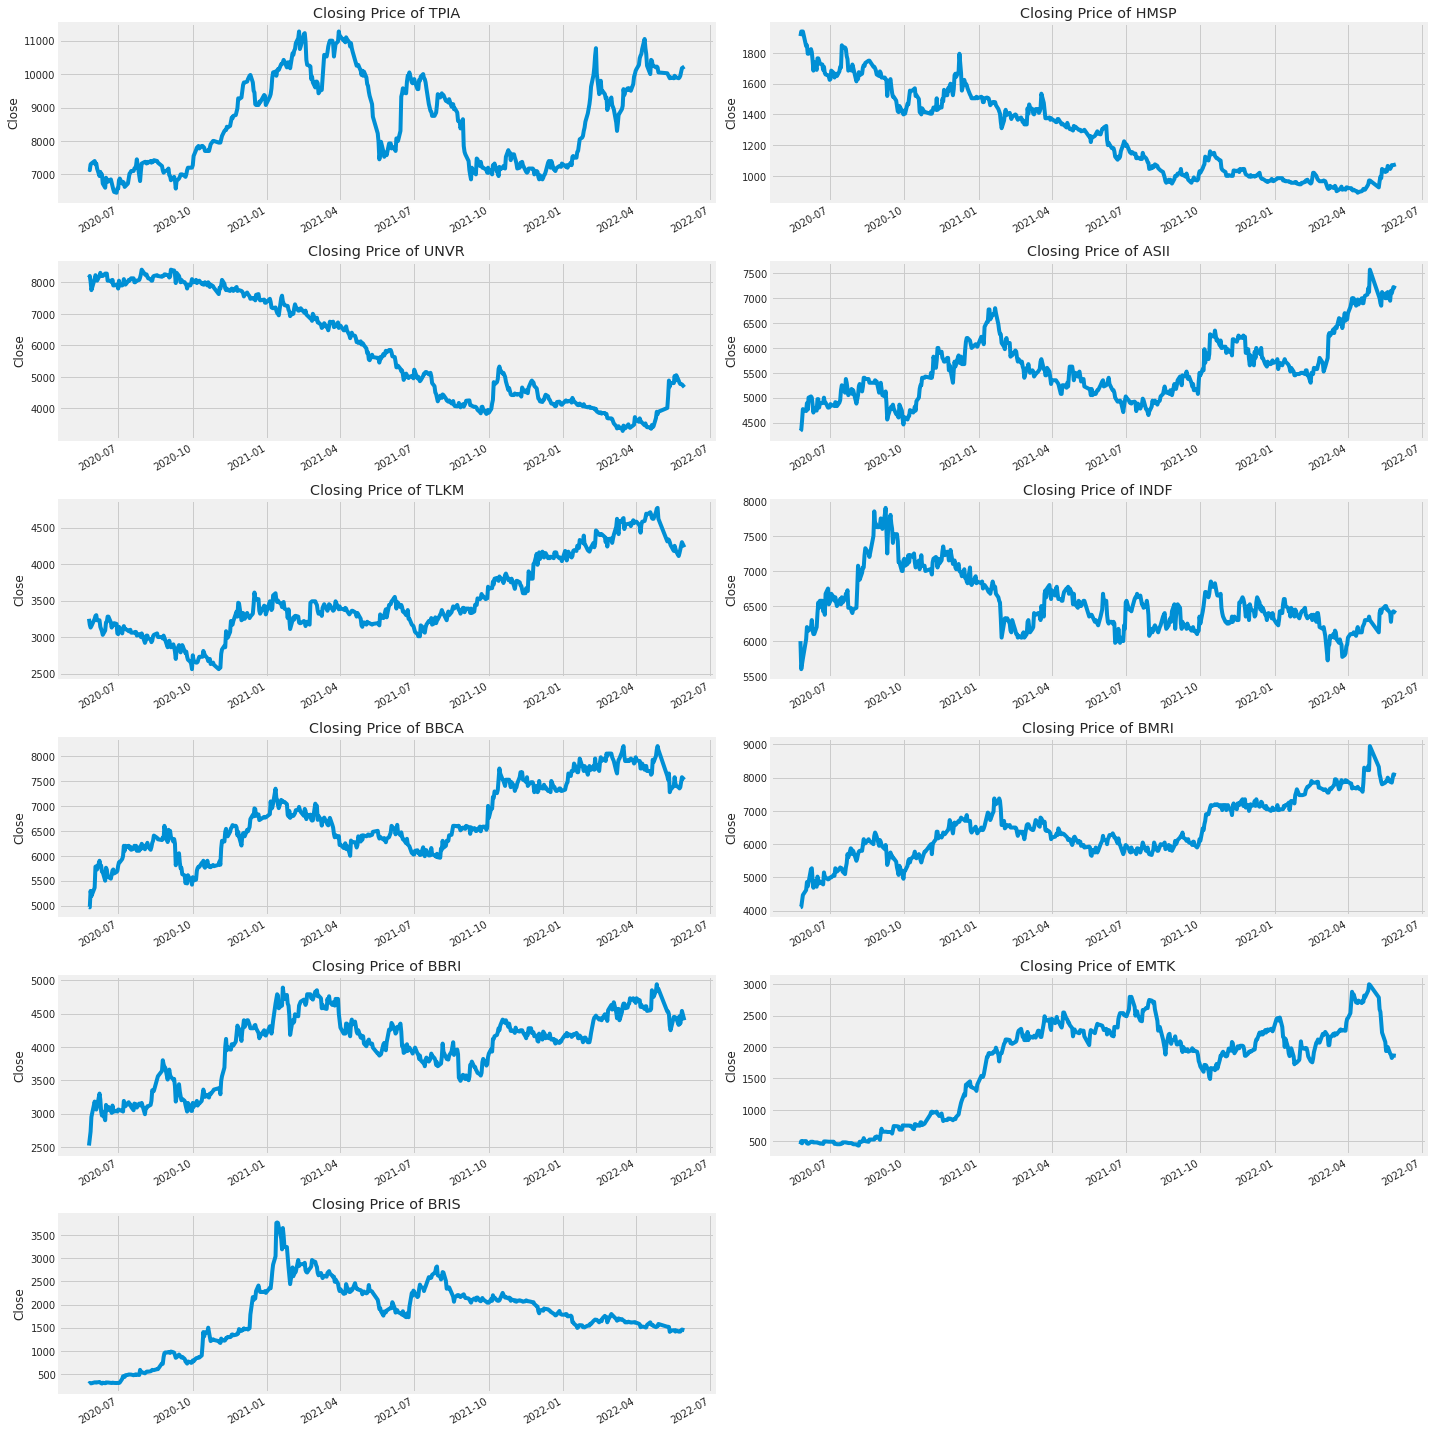

In [5]:
# Let's see a historical view of the closing price

plt.figure(figsize=(20, 20))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    #print(company)
    plt.subplot(6, 2, i)
    company['Close'].plot()
    plt.ylabel('Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {company_name[i - 1]}")
    
plt.tight_layout()

In [6]:
company_list=[TPIA,HMSP,UNVR,ASII,TLKM,INDF,BBCA,BMRI,BBRI,EMTK,BRIS]
tech_list=['TPIA.JK','HMSP.JK','UNVR.JK','ASII.JK','TLKM.JK','INDF.JK','BBCA.JK','BMRI.JK','BBRI.JK','EMTK.JK','BRIS.JK']
company_name=['TPIA','HMSP','UNVR','ASII','TLKM','INDF','BBCA','BMRI','BBRI','EMTK','BRIS']

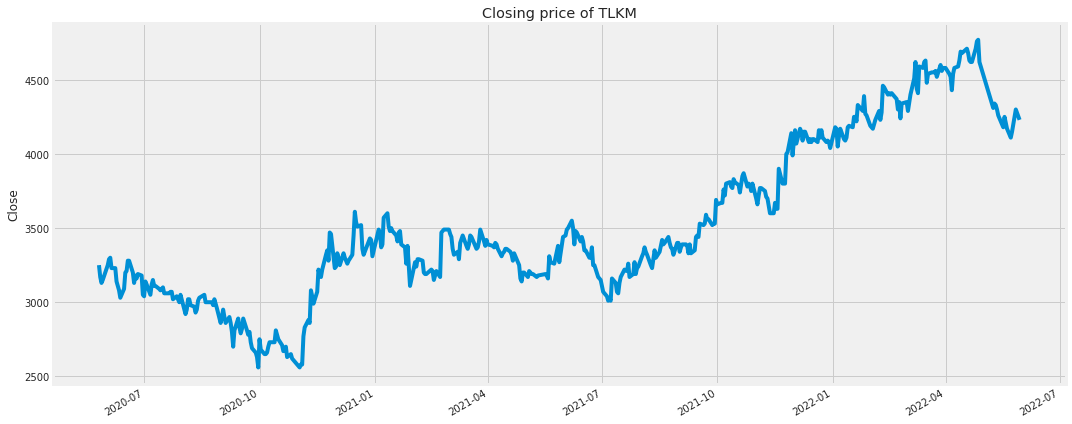

In [8]:
# Let's see a historical view of the closing price

plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)

#for i, company in enumerate(company_list, 1):
#plt.subplot(2, 2, i)
TLKM['Close'].plot()
plt.ylabel('Close')
plt.xlabel(None)
plt.title("Closing price of TLKM")
    
plt.tight_layout()

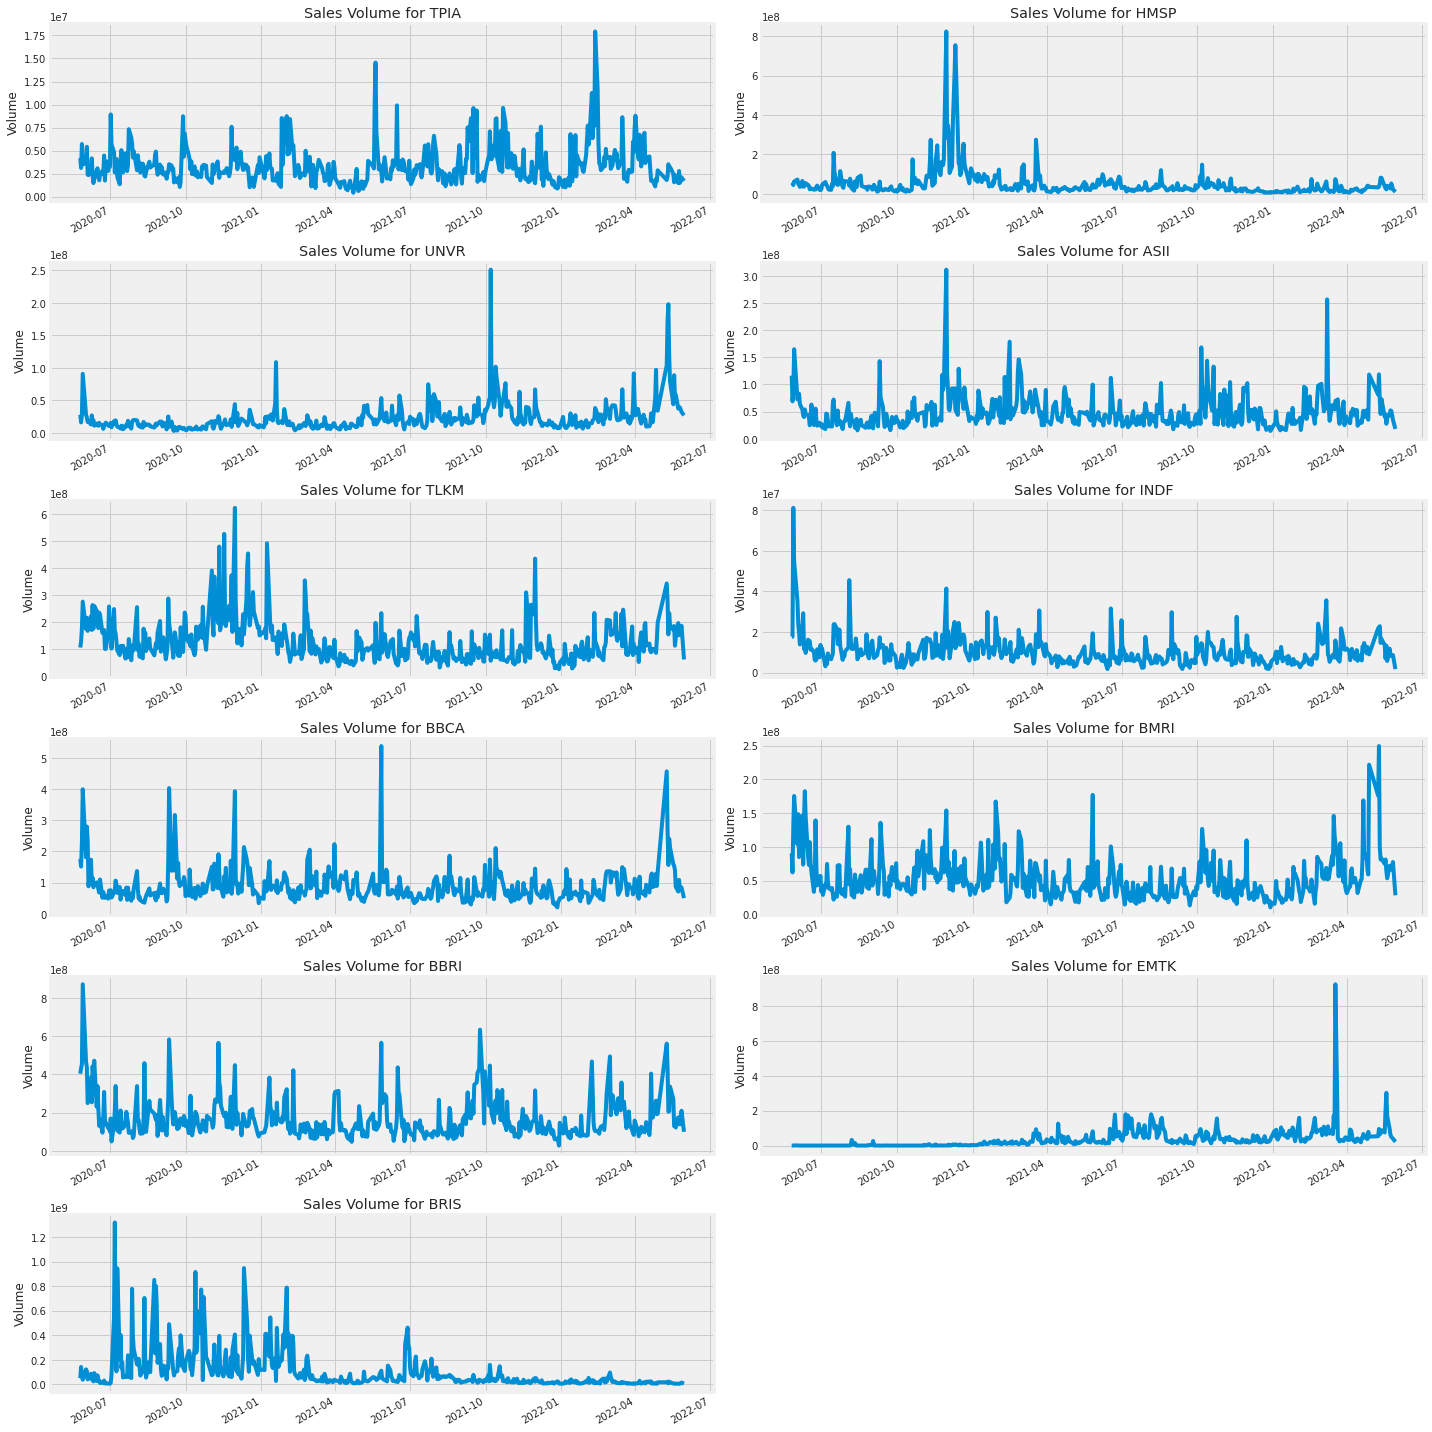

In [9]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(20, 20))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(6, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {company_name[i - 1]}")
    
plt.tight_layout()

Now that we've seen the visualizations for the closing price and the volume traded each day, let's go ahead and caculate the moving average for the stock.

# 2. What was the moving average of the various stocks?

In [12]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Close'].rolling(ma).mean()
        #f"{str(company)}_MA"[column_name] = f"{str(company)}_MA"['Close'].rolling(ma).mean()
        
TLKM

Adj Close   Close    High     Low    Open       Volume  \
Date                                                                   
2020-05-26  2944.089844  3250.0  3280.0  3130.0  3150.0  105792900.0   
2020-05-27  2871.619629  3170.0  3270.0  3150.0  3250.0  128693900.0   
2020-05-28  2835.384766  3130.0  3210.0  3130.0  3180.0  177385100.0   
2020-05-29  2853.502197  3150.0  3150.0  3080.0  3100.0  276092100.0   
2020-06-02  2944.089844  3250.0  3270.0  3120.0  3160.0  174790600.0   
...                 ...     ...     ...     ...     ...          ...   
2022-05-23  4110.000000  4110.0  4180.0  4070.0  4160.0  196569900.0   
2022-05-24  4150.000000  4150.0  4200.0  4120.0  4120.0  151693700.0   
2022-05-25  4200.000000  4200.0  4210.0  4150.0  4200.0  166595400.0   
2022-05-27  4300.000000  4300.0  4300.0  4210.0  4260.0  186513500.0   
2022-05-30  4230.000000  4230.0  4340.0  4200.0  4340.0   61651900.0   

           company_name  MA for 10 days  MA for 20 days  MA for 50 days  
Date                                                                     
2020-05-26         TLKM             NaN             NaN             NaN  
2020-05-27         TLKM             NaN             NaN             NaN  
2020-05-28         TLKM             NaN             NaN             NaN  
2020-05-29         TLKM             NaN             NaN             NaN  
2020-06-02         TLKM             NaN             NaN             NaN  
...                 ...             ...             ...             ...  
2022-05-23         TLKM          4246.0          4463.0          4510.4  
2022-05-24         TLKM          4230.0          4436.5          4507.6  
2022-05-25         TLKM          4216.0          4411.0          4503.6  
2022-05-27         TLKM          4213.0          4392.0          4499.4  
2022-05-30         TLKM          4206.0          4372.0          4491.6  

[487 rows x 10 columns]

Now let's go ahead and plot all the additional Moving Averages

In [11]:
#df.groupby("company_name").hist()
company_name

['TPIA',
 'HMSP',
 'UNVR',
 'ASII',
 'TLKM',
 'INDF',
 'BBCA',
 'BMRI',
 'BBRI',
 'EMTK',
 'BRIS']

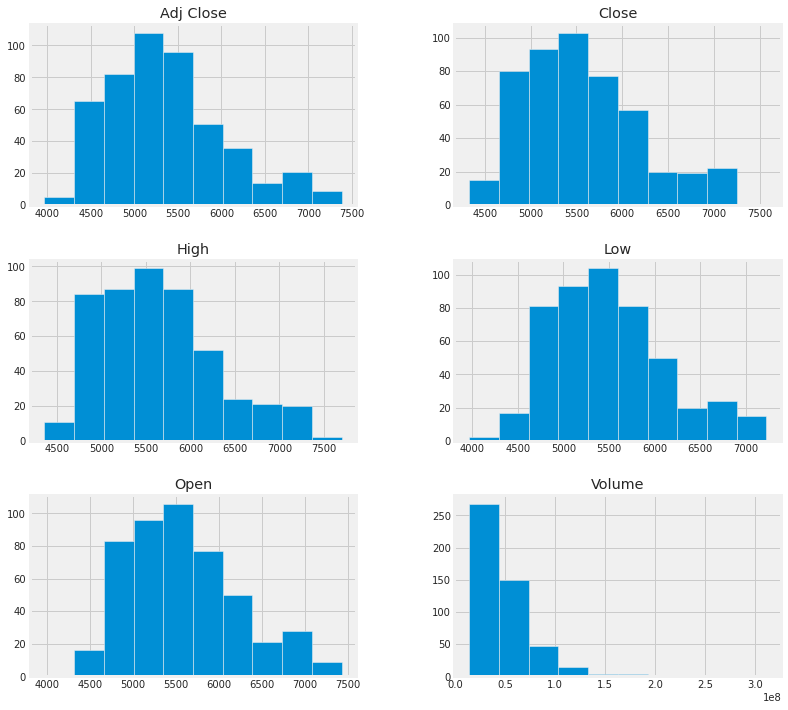

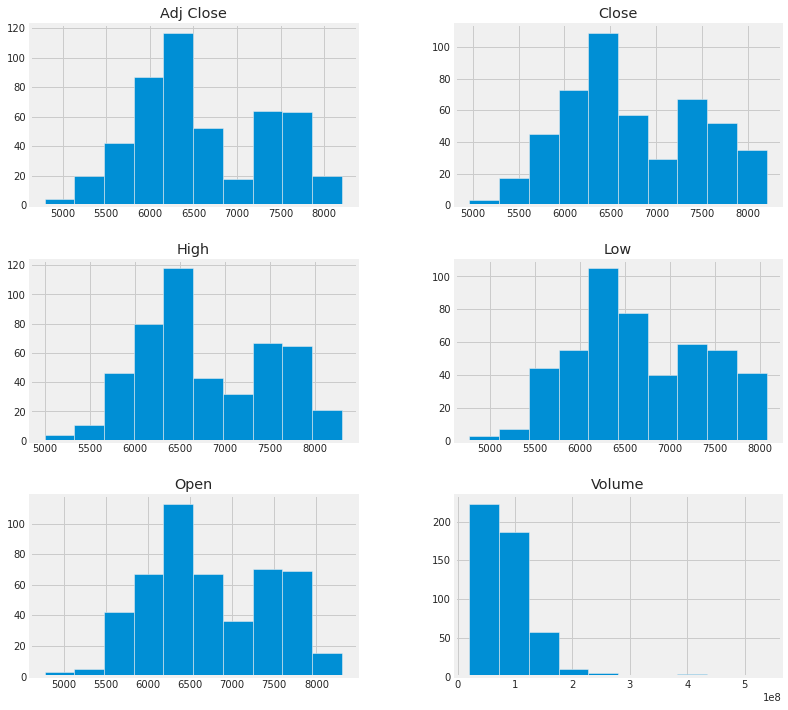

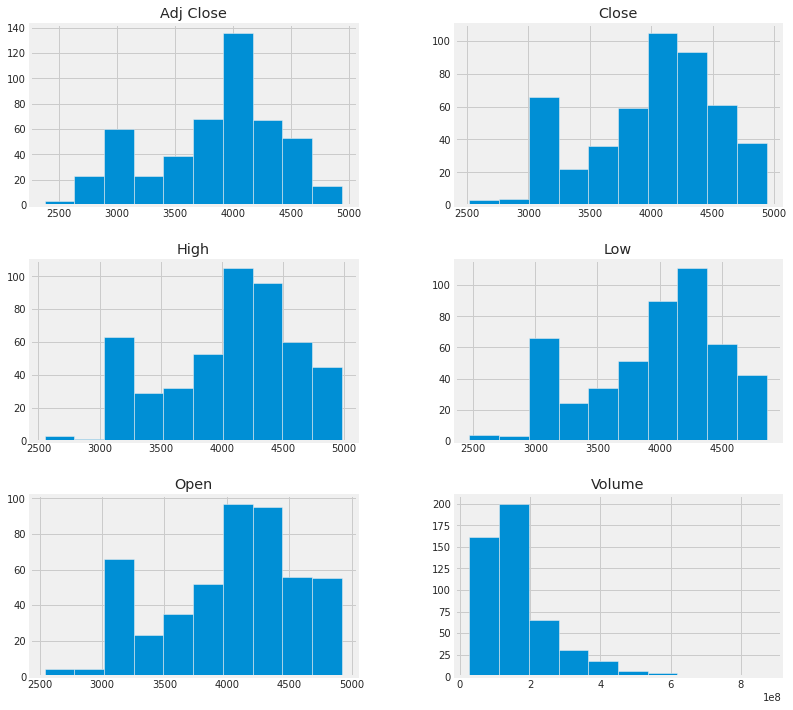

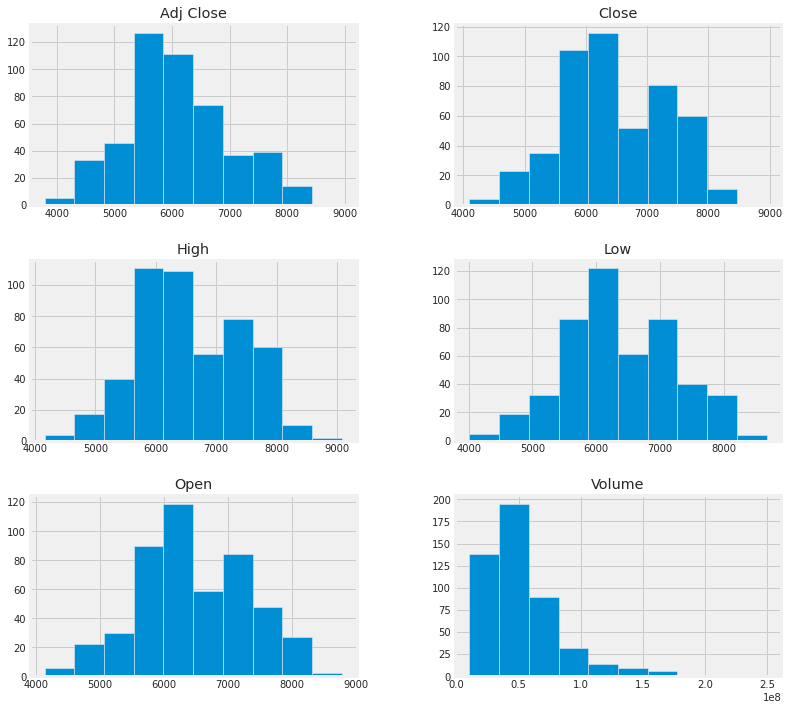

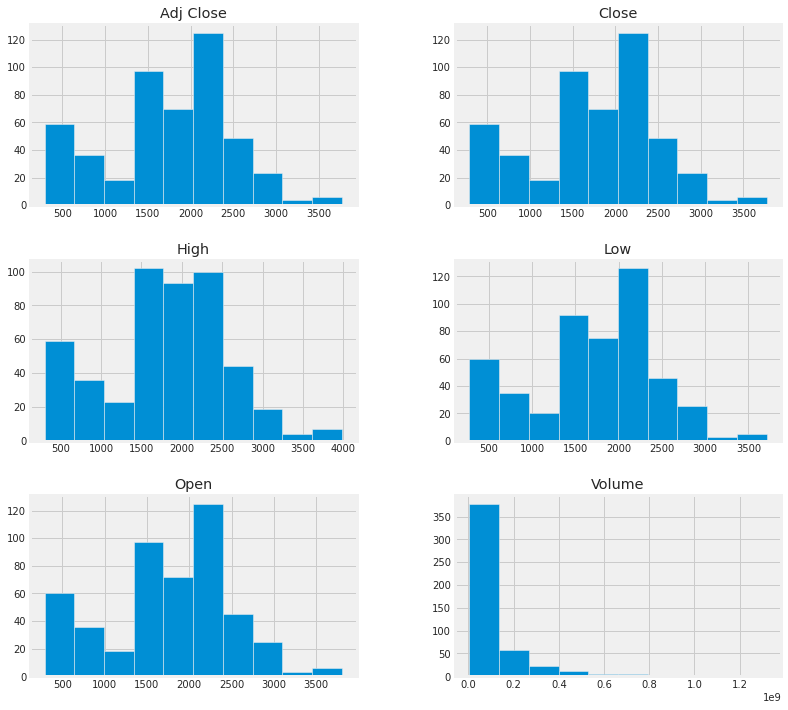

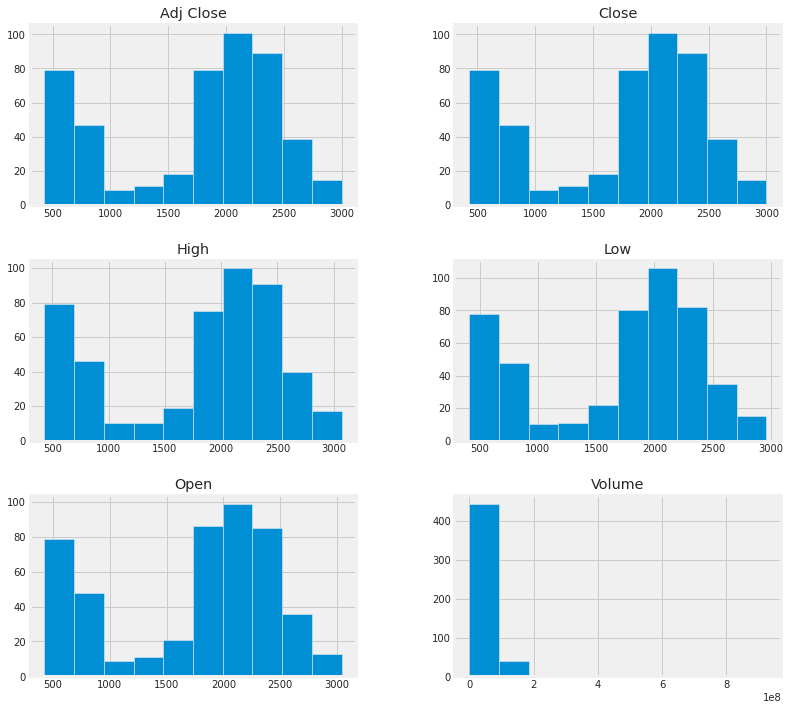

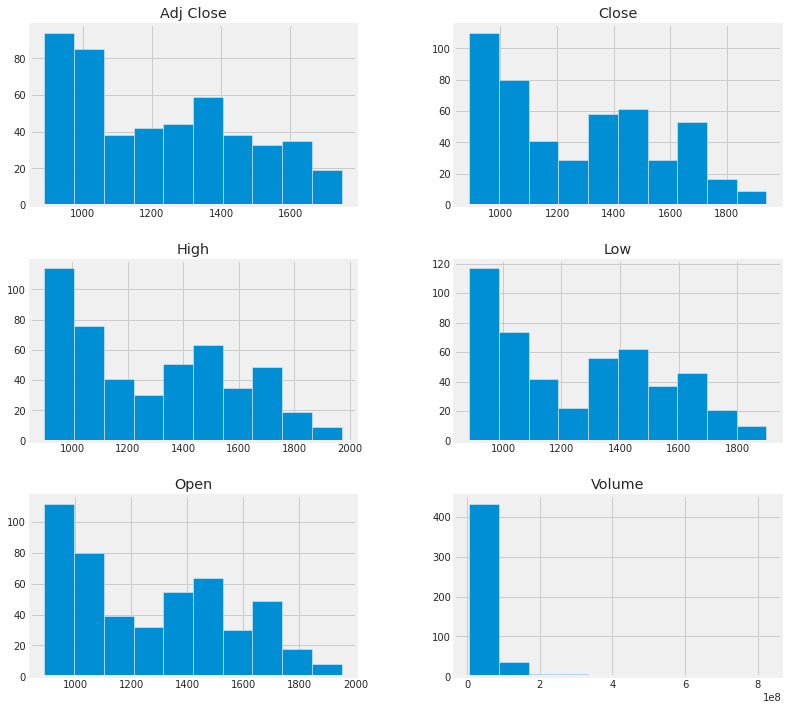

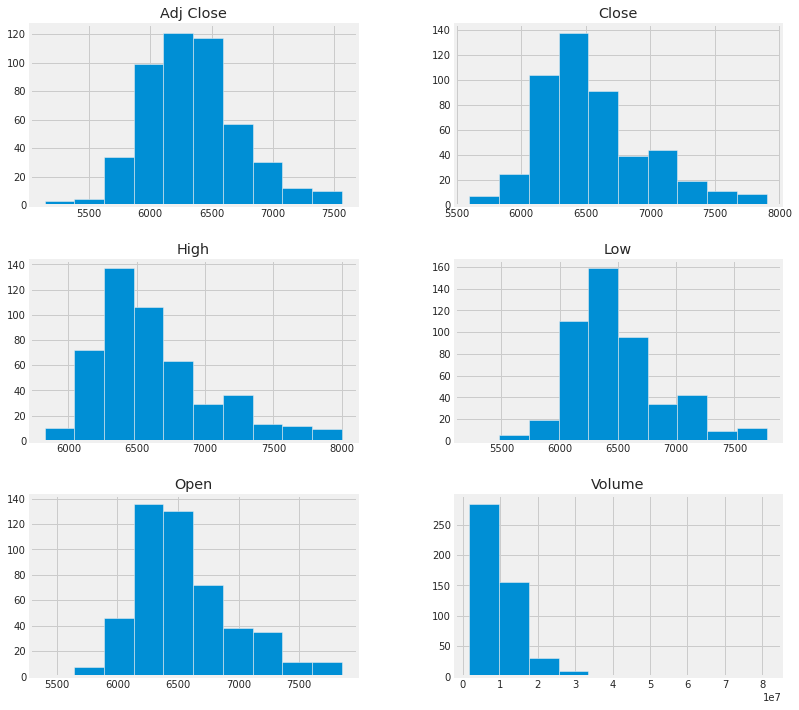

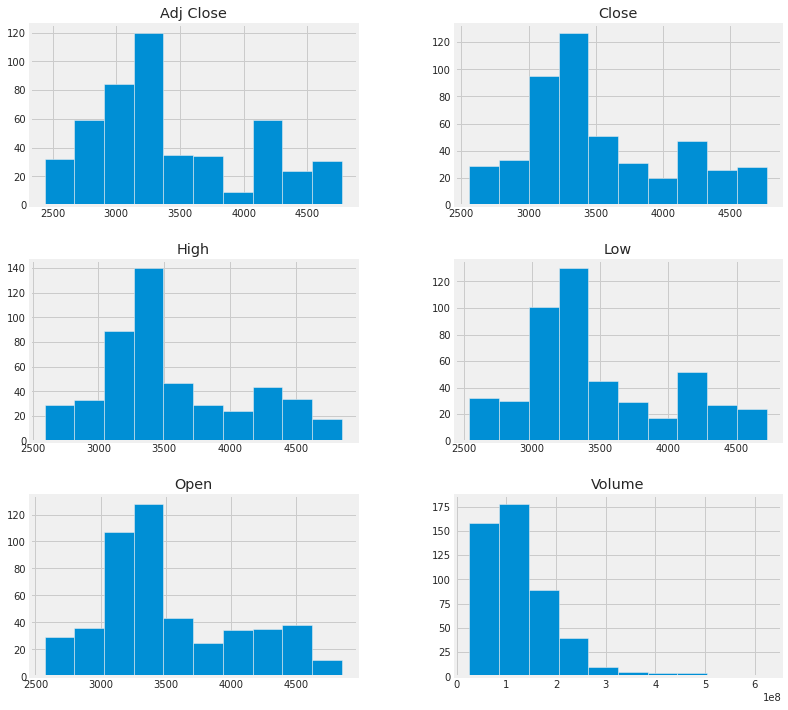

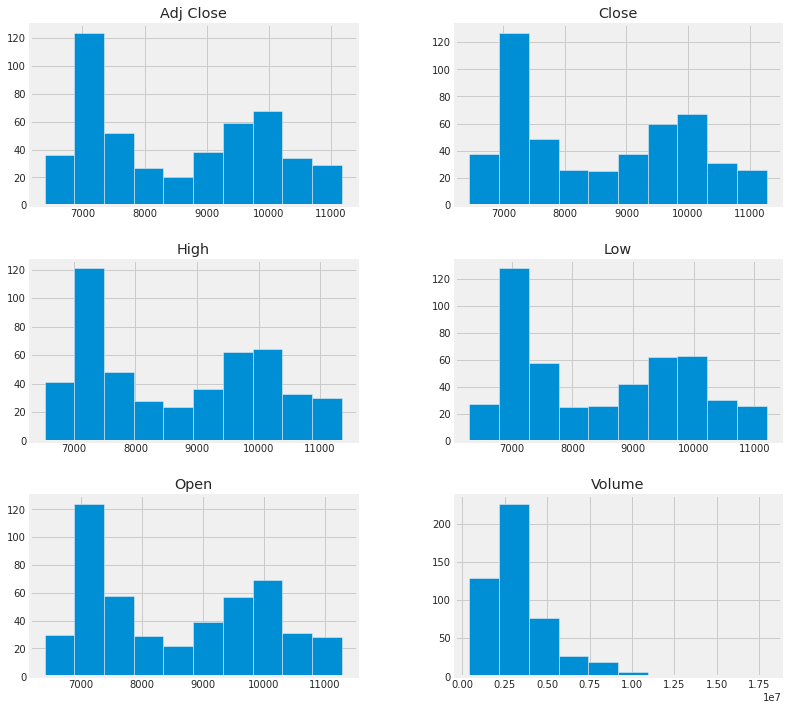

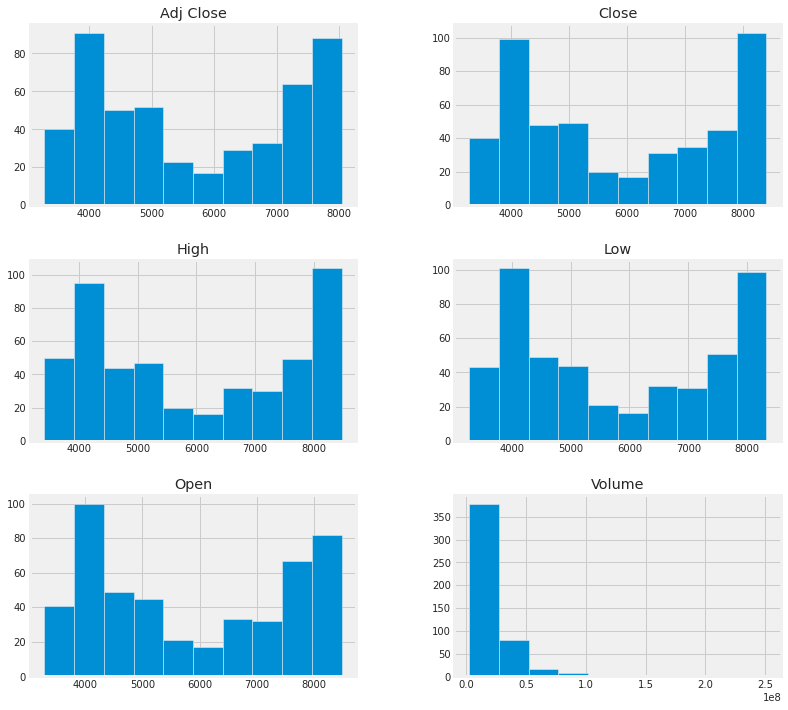

In [13]:
df.groupby("company_name").hist(figsize=(12, 12));   

In [14]:
company_name

['TPIA',
 'HMSP',
 'UNVR',
 'ASII',
 'TLKM',
 'INDF',
 'BBCA',
 'BMRI',
 'BBRI',
 'EMTK',
 'BRIS']

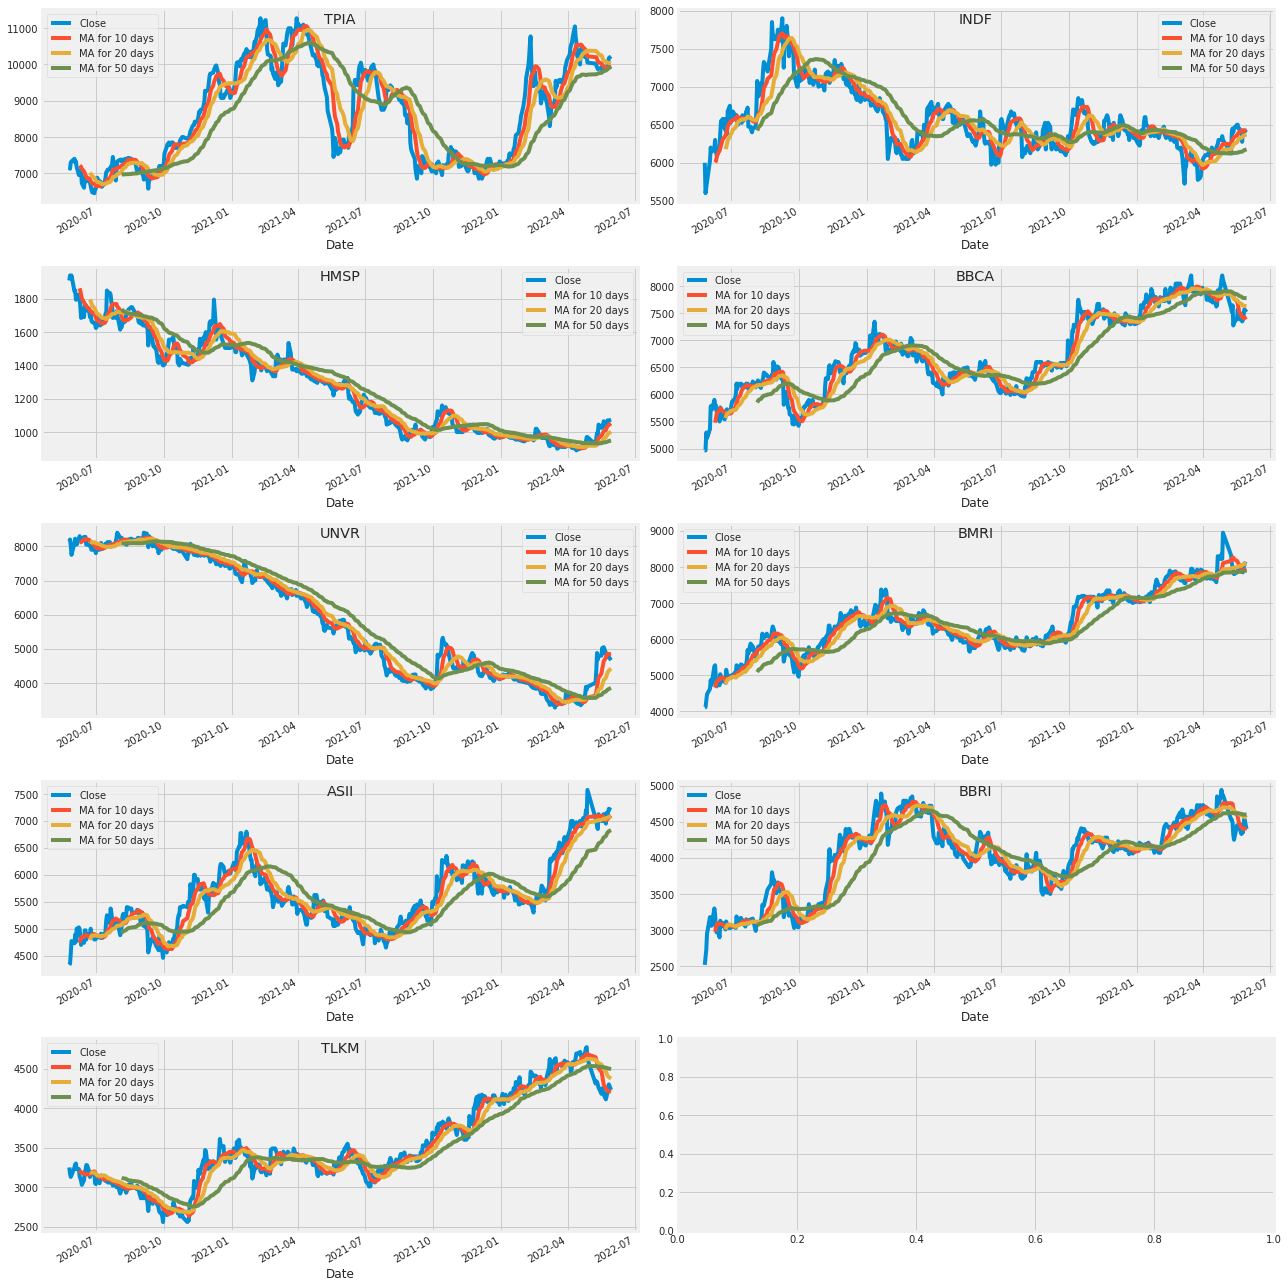

In [15]:

fig, axes = plt.subplots(nrows=5, ncols=2)
fig.set_figheight(18)
fig.set_figwidth(18)

for i in range (0,5):
    #plt.subplot(6, 2, i)
    company_list[i][['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[i,0])
    axes[i,0].set_title(company_name[i], y= 1.0, pad=-14)
    
    if i!=4 :
        company_list[i+5][['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[i,1])
        axes[i,1].set_title(company_name[i+5], y= 1.0, pad=-14)
    
fig.tight_layout()

# 3. What was the daily return of the stock on average?

Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve teh daily returns for the Apple stock.

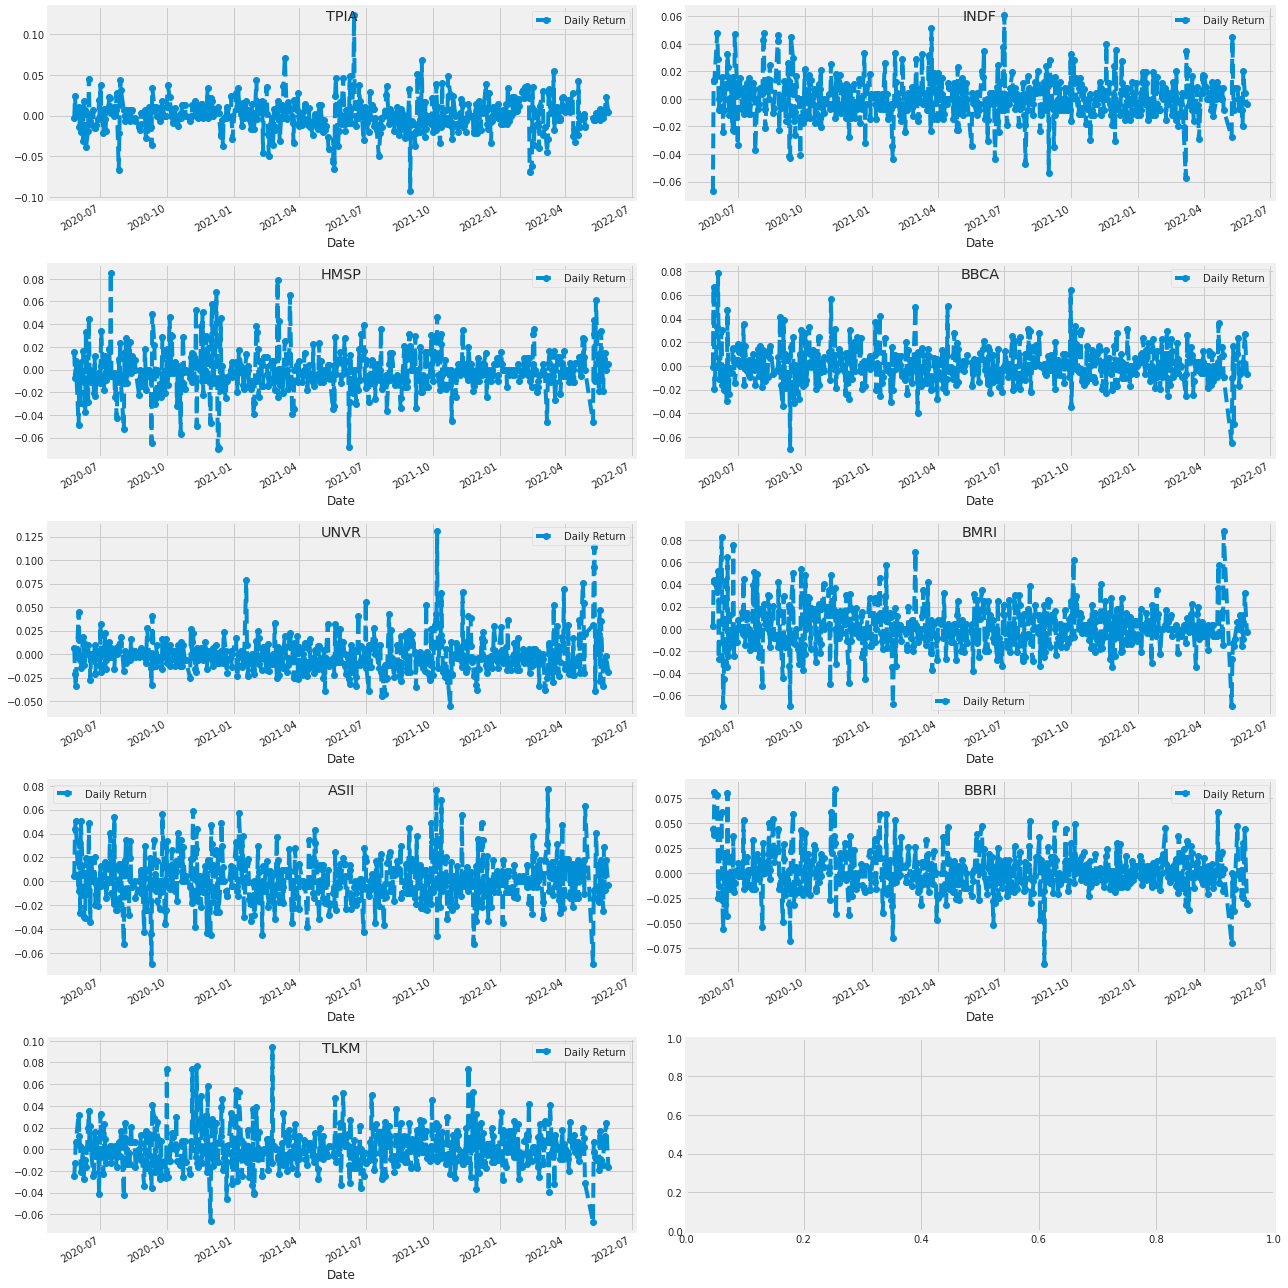

In [16]:

# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Close'].pct_change()

fig, axes = plt.subplots(nrows=5, ncols=2)
fig.set_figheight(18)
fig.set_figwidth(18)

for i in range (0,5):
   
    company_list[i]['Daily Return'].plot(ax=axes[i,0], legend=True, linestyle='--', marker='o')   
    #company_list[i]['Daily Return'].plot(ax=axes[i,0])    
    axes[i,0].set_title(company_name[i], y= 1.0, pad=-14)
    if i != 4:
        company_list[i+5]['Daily Return'].plot(ax=axes[i,1], legend=True, linestyle='--', marker='o')  
        #company_list[i]['Daily Return'].plot(ax=axes[i,0])    
        axes[i,1].set_title(company_name[i+5], y= 1.0, pad=-14)
    
fig.tight_layout()

Great, now let's get an overall look at the average daily return using a histogram. We'll use seaborn to create both a histogram and kde plot on the same figure.

ValueError: num must be 1 <= num <= 10, not 11

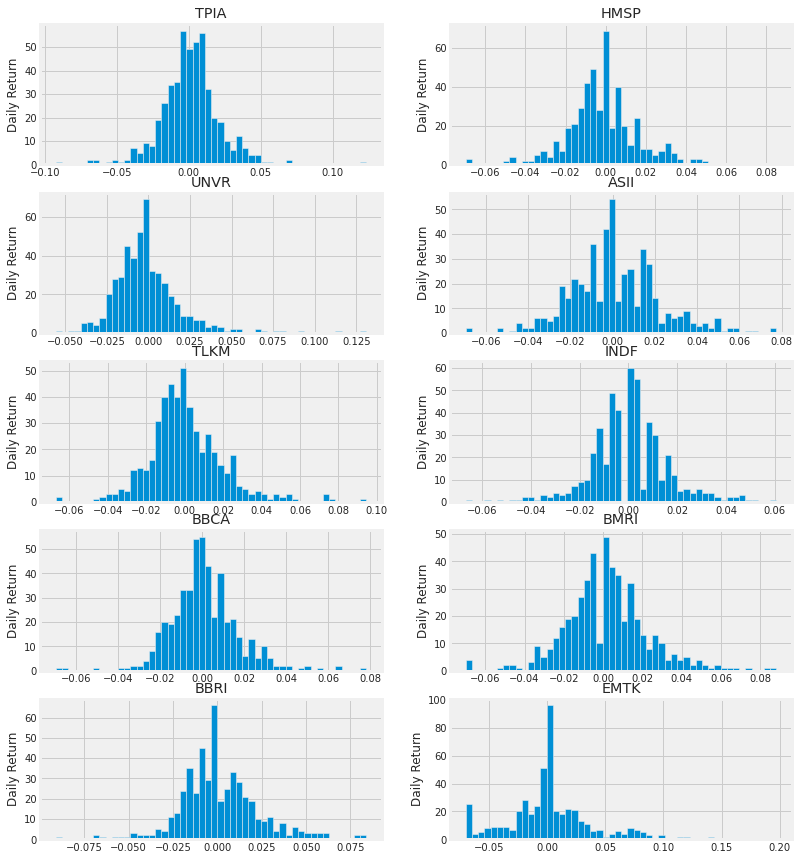

In [17]:
plt.figure(figsize=(12, 15))

for i, company in enumerate(company_list, 1):
    plt.subplot(5, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i-1]}')
    
plt.tight_layout()

# 4. What was the correlation between different stocks closing prices?

Now what if we wanted to analyze the returns of all the stocks in our list? Let's go ahead and build a DataFrame with all the ['Close'] columns for each of the stocks dataframes.

In [18]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = DataReader(tech_list, 'yahoo', start, end)['Close']
closing_df.columns=company_name

# Let's take a quick look
closing_df.head() 

TPIA    HMSP    UNVR    ASII    TLKM    INDF    BBCA    BMRI  \
Date                                                                         
2020-05-26  7150.0  1910.0  8150.0  4330.0  3250.0  6000.0  4970.0  4100.0   
2020-05-27  7125.0  1940.0  8200.0  4350.0  3170.0  5600.0  4965.0  4110.0   
2020-05-28  7300.0  1925.0  8025.0  4540.0  3130.0  5675.0  5295.0  4290.0   
2020-05-29  7325.0  1940.0  7750.0  4770.0  3150.0  5750.0  5190.0  4470.0   
2020-06-02  7400.0  1845.0  8100.0  4730.0  3250.0  6025.0  5360.0  4620.0   

              BBRI   EMTK   BRIS  
Date                              
2020-05-26  2520.0  450.0  290.0  
2020-05-27  2630.0  499.0  308.0  
2020-05-28  2730.0  465.0  302.0  
2020-05-29  2950.0  499.0  300.0  
2020-06-02  3180.0  500.0  320.0

Now that we have all the closing prices, let's go ahead and get the daily return for all the stocks, like we did for the Apple stock.

In [19]:
# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets #.head()

TPIA      HMSP      UNVR      ASII      TLKM      INDF  \
Date                                                                     
2020-05-26       NaN       NaN       NaN       NaN       NaN       NaN   
2020-05-27 -0.003497  0.015707  0.006135  0.004619 -0.024615 -0.066667   
2020-05-28  0.024561 -0.007732 -0.021341  0.043678 -0.012618  0.013393   
2020-05-29  0.003425  0.007792 -0.034268  0.050661  0.006390  0.013216   
2020-06-02  0.010239 -0.048969  0.045161 -0.008386  0.031746  0.047826   
...              ...       ...       ...       ...       ...       ...   
2022-05-23 -0.002525 -0.018779 -0.033663 -0.024561 -0.014388 -0.007752   
2022-05-24  0.002532  0.009569 -0.014344  0.028777  0.009732 -0.019531   
2022-05-25  0.005051  0.014218 -0.008316 -0.006993  0.012048  0.019920   
2022-05-27  0.022613  0.000000 -0.002096  0.017606  0.023810  0.003906   
2022-05-30  0.004914  0.004673 -0.018908 -0.003460 -0.016279 -0.003891   

                BBCA      BMRI      BBRI      EMTK      BRIS  
Date                                                          
2020-05-26       NaN       NaN       NaN       NaN       NaN  
2020-05-27 -0.001006  0.002439  0.043651  0.108889  0.062069  
2020-05-28  0.066465  0.043796  0.038023 -0.068136 -0.019481  
2020-05-29 -0.019830  0.041958  0.080586  0.073118 -0.006623  
2020-06-02  0.032755  0.033557  0.077966  0.002004  0.066667  
...              ...       ...       ...       ...       ...  
2022-05-23 -0.003378 -0.015625 -0.022573 -0.052500 -0.017361  
2022-05-24 -0.003390  0.006349  0.030023 -0.010554  0.003534  
2022-05-25  0.003401 -0.009464 -0.024664 -0.026667 -0.003521  
2022-05-27  0.027119  0.031847  0.043678  0.021918  0.031802  
2022-05-30 -0.006601 -0.003086 -0.030837 -0.002681 -0.010274  

[487 rows x 11 columns]

Now we can compare the daily percentage return of two stocks to check how correlated. First let's see a sotck compared to itself.

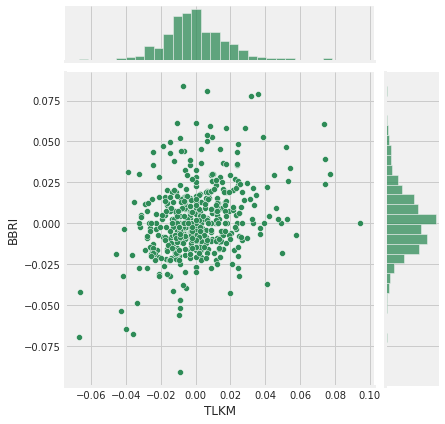

In [21]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='TLKM', y='BBRI', data=tech_rets, kind='scatter', color='seagreen')

So now we can see that if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur. 

Seaborn and pandas make it very easy to repeat this comparison analysis for every possible combination of stocks in our technology stock ticker list. We can use sns.pairplot() to automatically create this plot

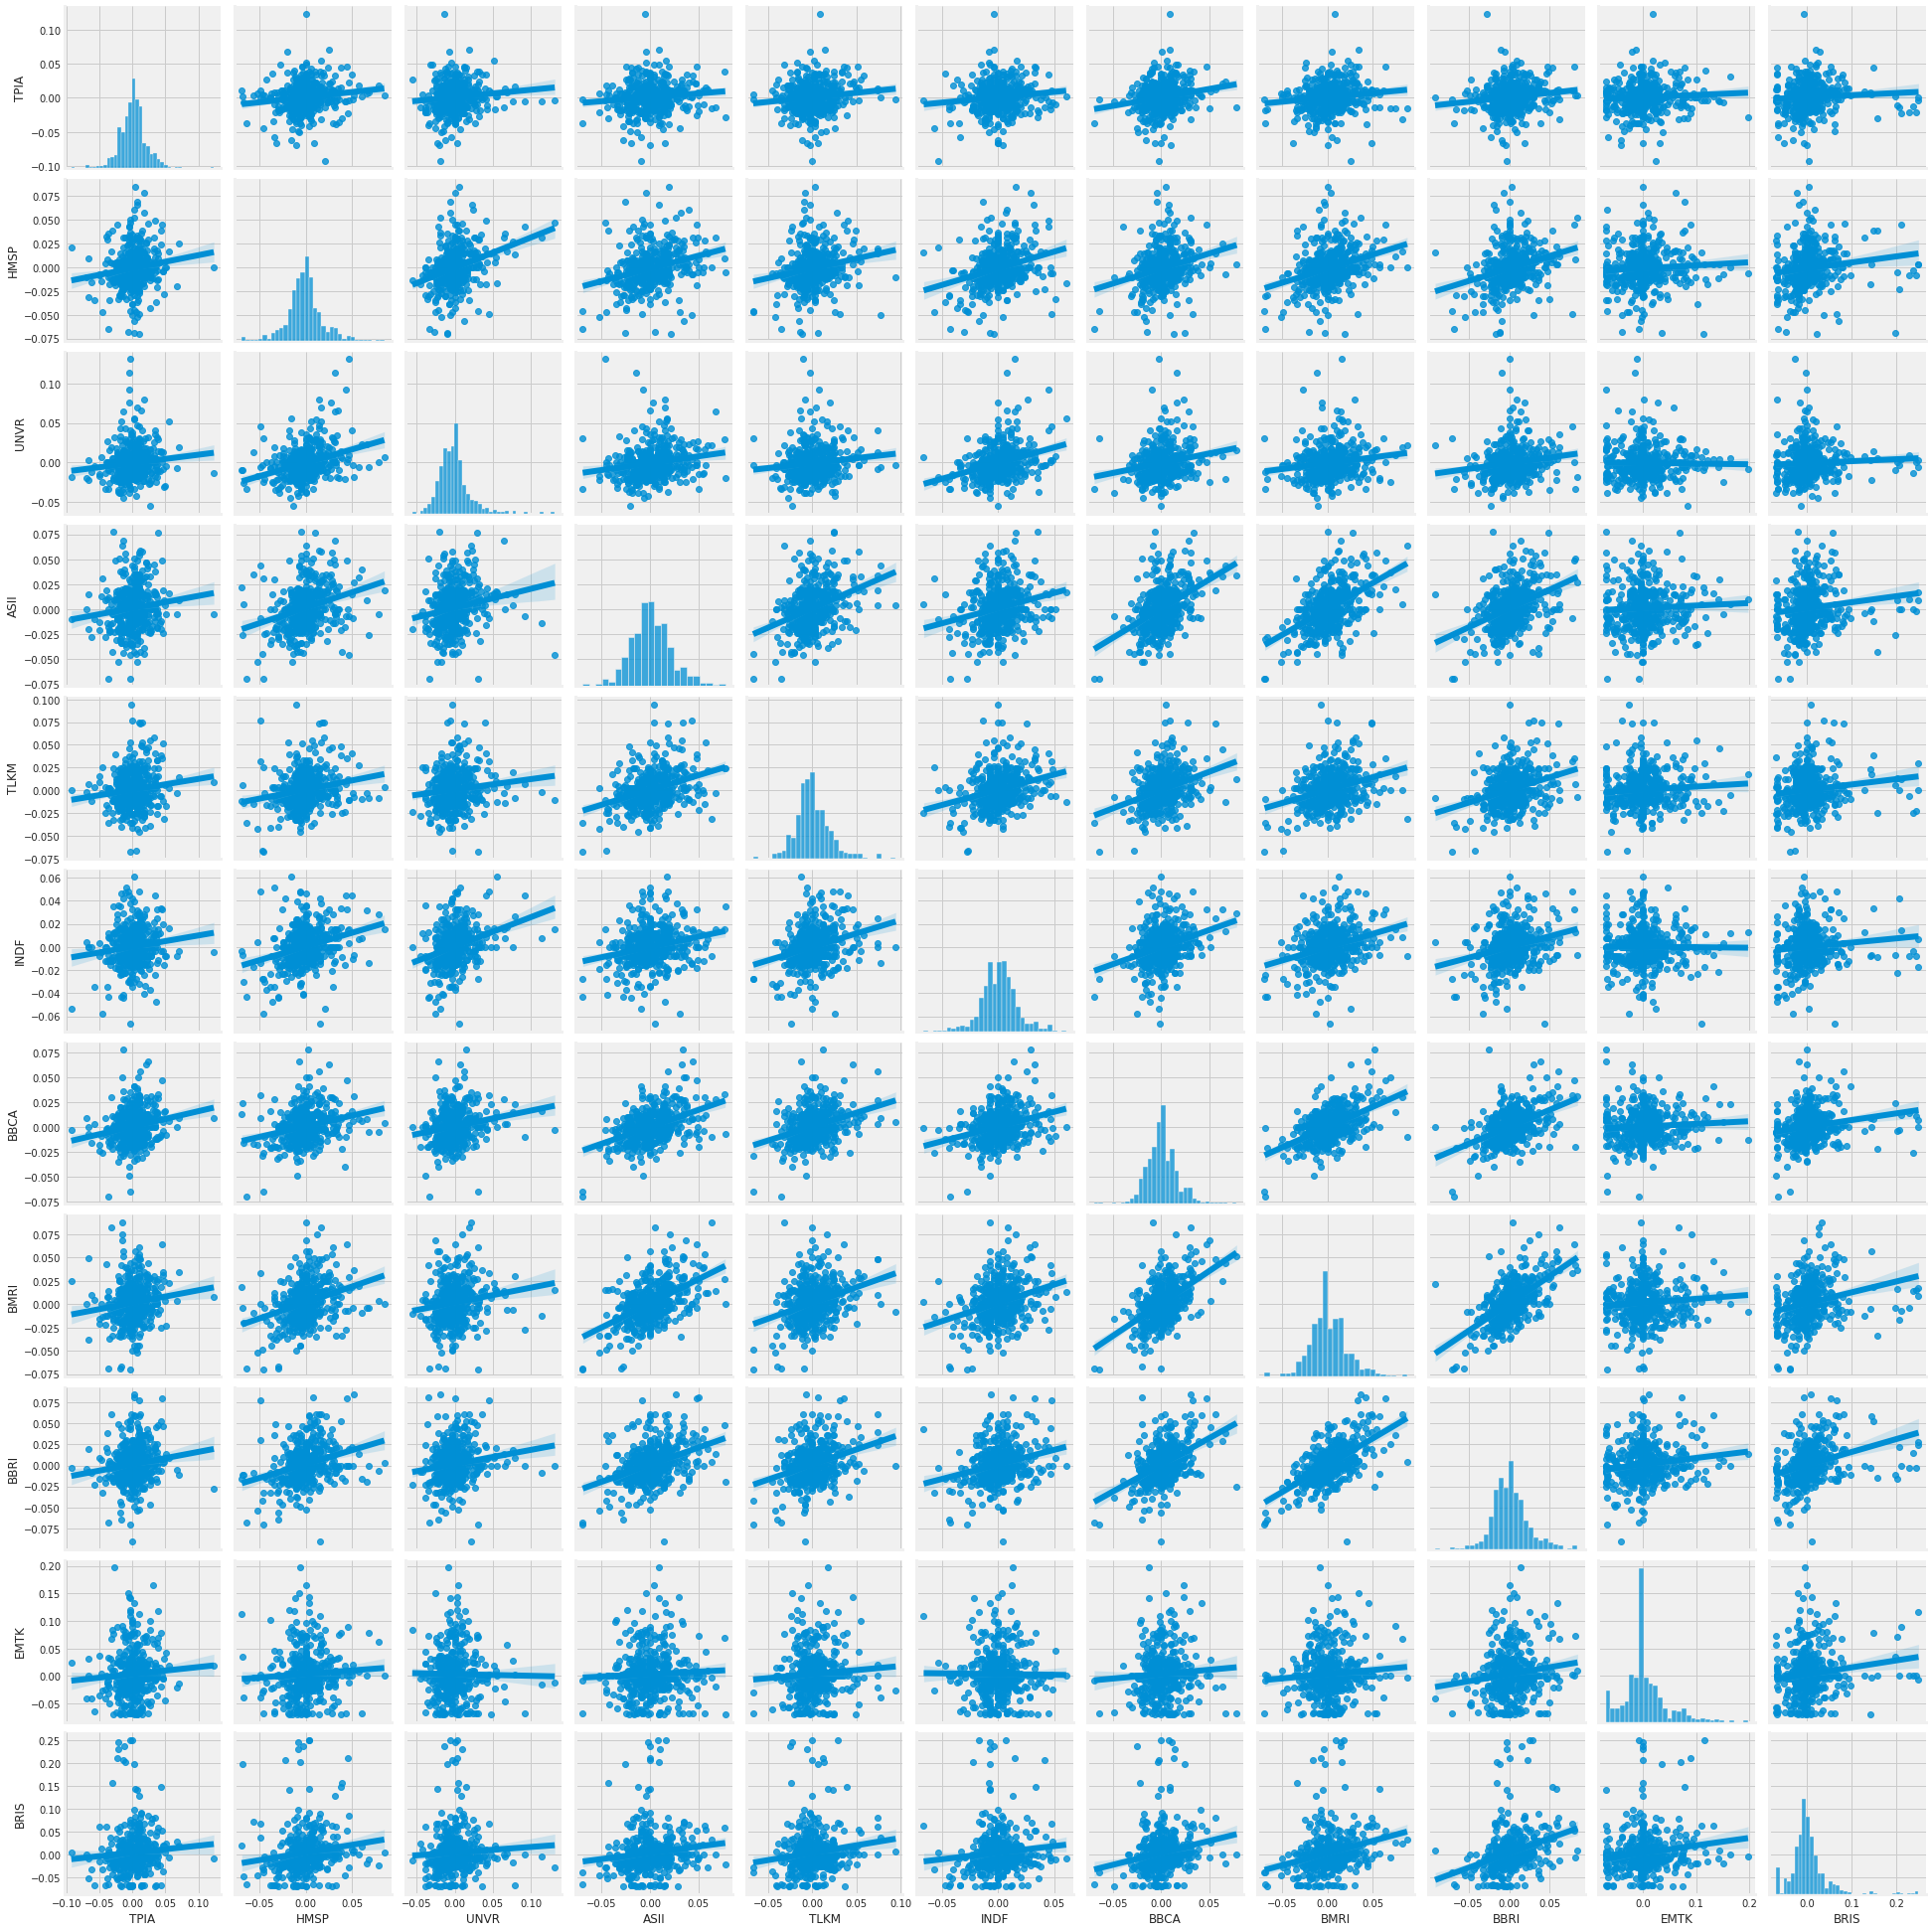

In [20]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

Above we can see all the relationships on daily returns between all the stocks. A quick glance shows an interesting correlation between Google and Amazon daily returns. It might be interesting to investigate that individual comaprison. While the simplicity of just calling sns.pairplot() is fantastic we can also use sns.PairGrid() for full control of the figure, including what kind of plots go in the diagonal, the upper triangle, and the lower triangle. Below is an example of utilizing the full power of seaborn to achieve this result.

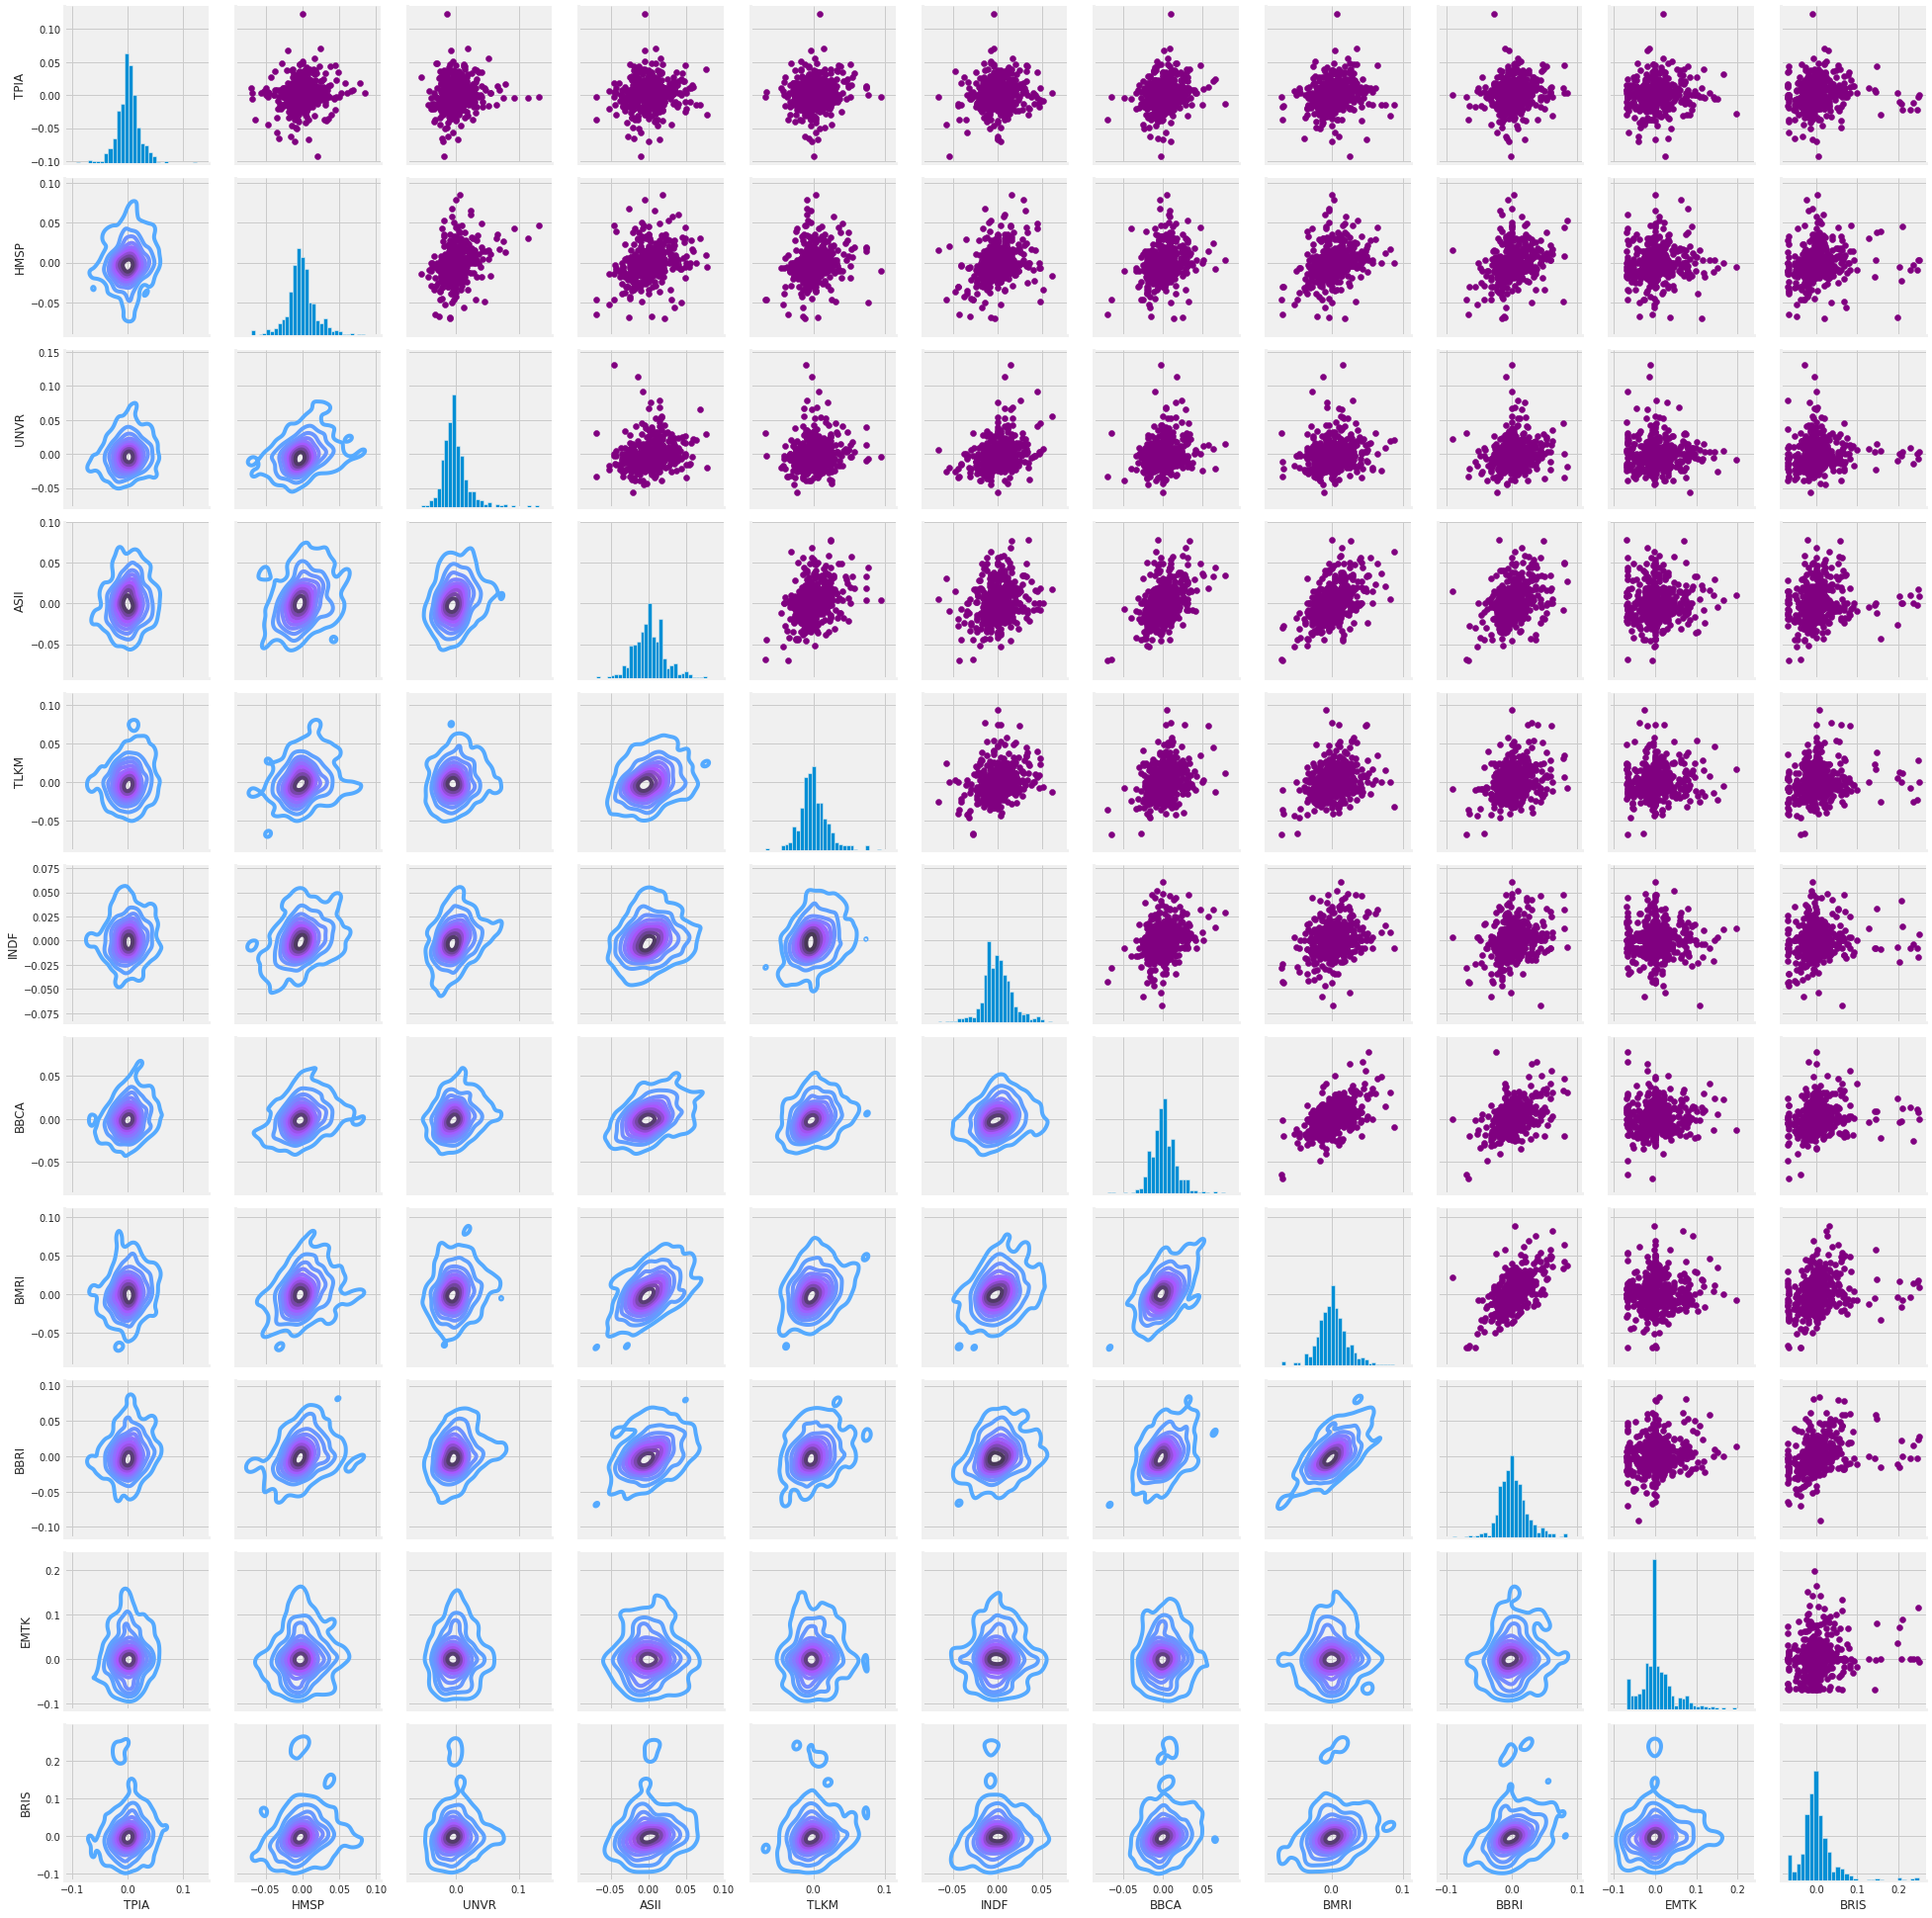

In [22]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

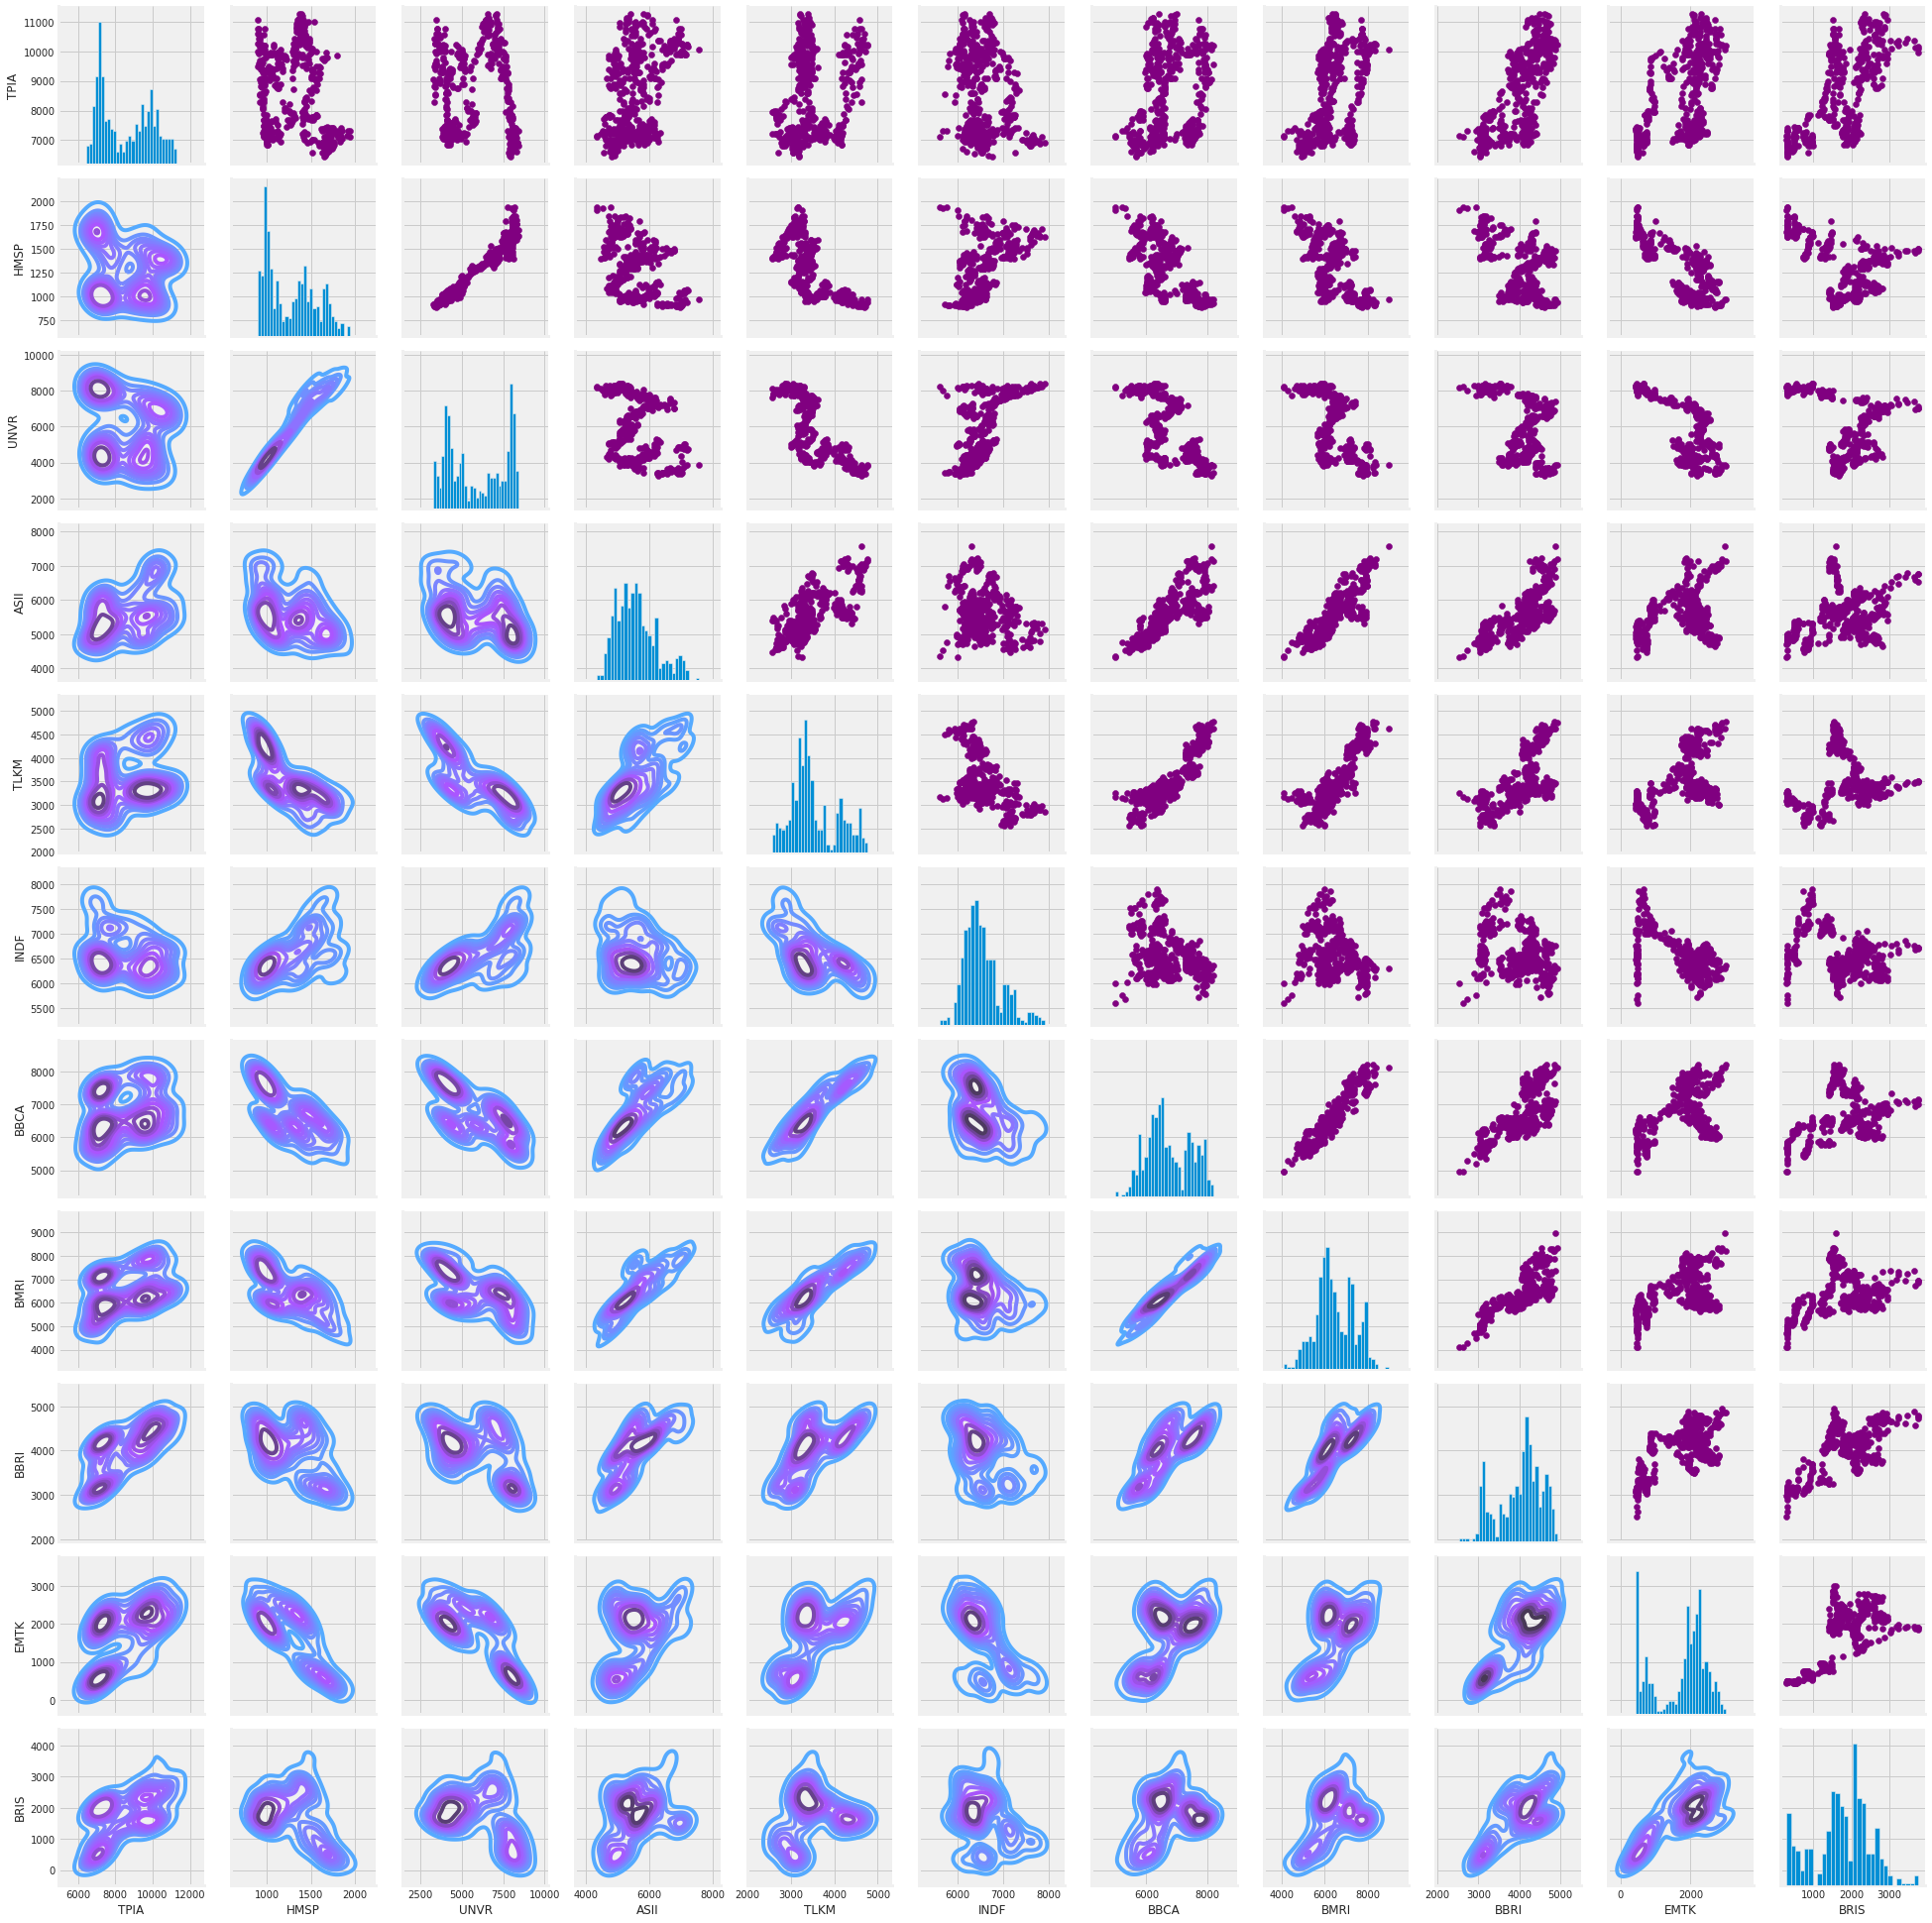

In [23]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Finally, we could also do a correlation plot, to get actual numerical values for the correlation between the stocks' daily return values. By comparing the closing prices, we see an interesting relationship between Microsoft and Apple.

<AxesSubplot:>

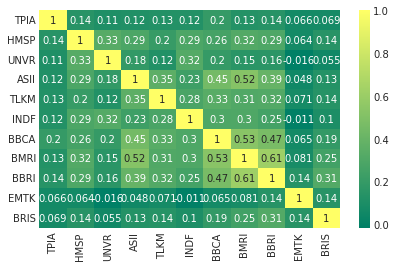

In [24]:
# Let's go ahead and use sebron for a quick correlation plot for the daily returns
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')

<AxesSubplot:>

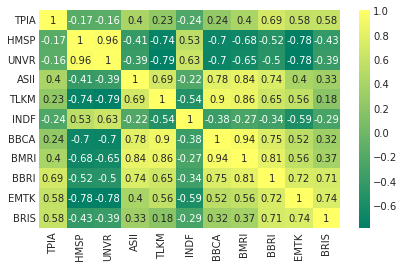

In [25]:
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')

Fantastic! Just like we suspected in our PairPlot we see here numerically and visually that Microsoft and Amazon had the strongest correlation of daily stock return. It's also interesting to see that all the technology comapnies are positively correlated.

# 5. How much value do we put at risk by investing in a particular stock?

There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

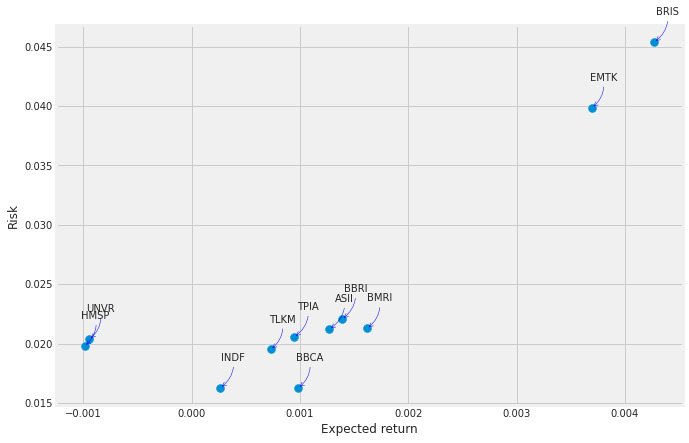

In [26]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame

rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 7))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

#for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
for label, x, y in zip(company_name, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(25, 25), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='->', color='blue', connectionstyle='arc3,rad=-0.3'))
    

# 6. Predicting the closing price stock price of ... inc:

In [27]:
#company_list=[FB,TSLA,AAPL,NDX,AMZN,MSFT,NVDA,BABA,GOOGL]
#tech_list=['FB','TSLA','AAPL','NDX','AMZN','MSFT','NVDA','BABA','GOOGL']
#company_name=['FB','TSLA','AAPL','NDX','AMZN','MSFT','NVDA','BABA','GOOGL']


company_name

['TPIA',
 'HMSP',
 'UNVR',
 'ASII',
 'TLKM',
 'INDF',
 'BBCA',
 'BMRI',
 'BBRI',
 'EMTK',
 'BRIS']

In [39]:
company_name[4]

'TLKM'

In [51]:
# Get the stock quote

pil_stock = company_name[4]

df = DataReader(tech_list[4], data_source='yahoo', start=start, end=end)   #2012-01-01 ,  2020-05-22
#df = tech_list[4]
# Show teh data
#print(company_name)
print('')
print(pil_stock)
df


TLKM


High     Low    Open   Close       Volume    Adj Close
Date                                                                
2020-05-26  3280.0  3130.0  3150.0  3250.0  105792900.0  2944.089844
2020-05-27  3270.0  3150.0  3250.0  3170.0  128693900.0  2871.619629
2020-05-28  3210.0  3130.0  3180.0  3130.0  177385100.0  2835.384766
2020-05-29  3150.0  3080.0  3100.0  3150.0  276092100.0  2853.502197
2020-06-02  3270.0  3120.0  3160.0  3250.0  174790600.0  2944.089844
...            ...     ...     ...     ...          ...          ...
2022-05-23  4180.0  4070.0  4160.0  4110.0  196569900.0  4110.000000
2022-05-24  4200.0  4120.0  4120.0  4150.0  151693700.0  4150.000000
2022-05-25  4210.0  4150.0  4200.0  4200.0  166595400.0  4200.000000
2022-05-27  4300.0  4210.0  4260.0  4300.0  186513500.0  4300.000000
2022-05-30  4340.0  4200.0  4340.0  4230.0   61651900.0  4230.000000

[487 rows x 6 columns]

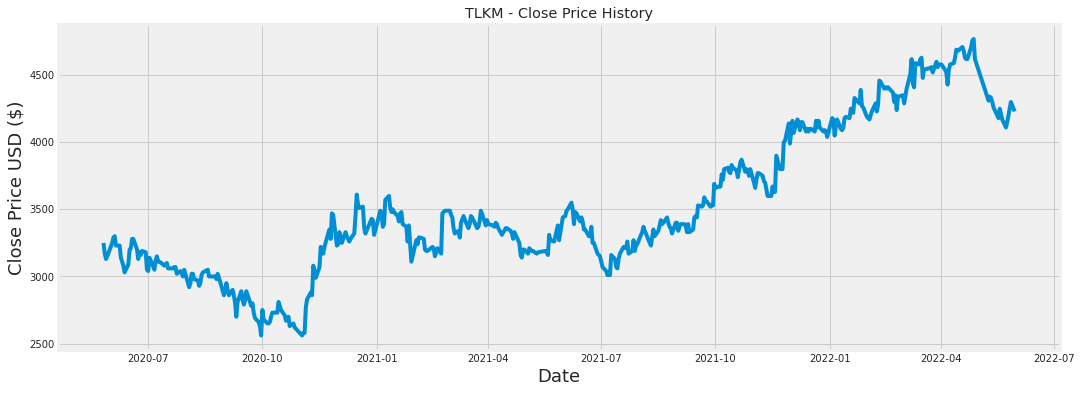

In [52]:
plt.figure(figsize=(16,6))
plt.title(company_name[4]+' - Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [53]:
def newdataframe (df=df, tambah_hari=5):  #,training_data_len=500):
    # Create a new dataframe with only the 'Close column 
    data = df.filter(['Close']).copy()
    # Convert the dataframe to a numpy array

    #print('')
    #display('data before add date:',data[-3:])
    #print('len(data)',len(data))
    #print('')

    data0 = data[-1:].copy()
    data0['Close'] = np.nan

    tambah_hari=tambah_hari
    for add_date in range(tambah_hari):
        data0.index=data.index.unique()[-1:]+ pd.Timedelta(days=1) 
        data=data.append(data0)
    #display('data after add date:',data[-(tambah_hari+3):])
    #print('len(data)',len(data))
    #print('')

    #dataset = data.values
    # Get the number of rows to train the model on
    #training_data_len = int(np.ceil( len(dataset) * .95 ))
    #training_data_len=training_data_len
    #display('dataset after add date:',dataset[-(tambah_hari+3):])
    #print('len(dataset)',len(dataset))

    return data #,dataset

def scale (data):     
    # Scale the data
    dataset = data.values    
    scaler = MinMaxScaler(feature_range=(0,1))
    scaled_data = scaler.fit_transform(dataset)
    #print('Jumlah data=',len(scaled_data))
    #scaled_data[-10:]
    return scaled_data, scaler

In [54]:
def training_data (scaled_data,training_data_len=500,num_rows=5):
    # Create the training data set 
    #num_rows = 5
    train_data = scaled_data[0:int(training_data_len), :]
    # Split the data into x_train and y_train data sets
    x_train = []
    y_train = []

    for i in range(num_rows, len(train_data)):
        #print('data ',i-num_rows,'-',i)
        x_train.append(train_data[i-num_rows:i, 0])
        y_train.append(train_data[i, 0])
        """
        if i<= num_rows+2:
            print('data ',i-num_rows,'-',i)
            print('x_train:',x_train[i-num_rows:i])
            print('y_train:',y_train[i-num_rows:i])
            print('')
        if (i == 100) | (i == 101) | (i == 102) :  # | (.5*len(train_data)+1 )):
            print('               ...')

        if i>= len(train_data)-2:
            print('data ',i-num_rows,'-',i)
            print('x_train:',x_train[i-num_rows:i])
            print('y_train:',y_train[i-num_rows:i])
            print('')    
        """

    # Convert the x_train and y_train to numpy arrays 
    x_train, y_train = np.array(x_train), np.array(y_train)
    # Reshape the data
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
    # x_train.shape
    
    return x_train, y_train

In [63]:
def build_model(x_train, y_train,batch_size=10, epochs=5):
    # Build the LSTM model
    model = Sequential()
    model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
    model.add(LSTM(64, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))

    #Compile the model RMSprop Ver1 (very good)
    model.compile(optimizer='RMSprop', loss='mean_squared_error')

    # Compile the model adam (good)
    #model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs)
    
    return model

In [56]:
def testing_data(data, training_data_len, num_rows):
    # Create the testing data set
    test_data = scaled_data[training_data_len - num_rows: , :]
    # Create the data sets x_test and y_test
    x_test = []
    dataset=data.values
    y_test = dataset[training_data_len:, :]
    for i in range(num_rows, len(test_data)):
        x_test.append(test_data[i-num_rows:i, 0])

    # Convert the data to a numpy array
    x_test = np.array(x_test)

    # Reshape the data
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))
    #print('x_test',x_test.shape)
    #print(x_test[-5:]) 
    #print('')
    #print('y_test',y_test.shape)
    #print(y_test[-5:])
    return x_test, y_test

In [64]:
%%time
#parameter
tambah_hari=20
training_data_len=450
num_rows=10

#print('--------------')
data=newdataframe(df,tambah_hari).copy()
data_graf=newdataframe(df,tambah_hari).copy()

for tambah in range (0,tambah_hari):
    print('')
    print('------------------')
    print('tambah hari ke :',tambah)
    print('------------------')
    print('')
    scaled_data, scaler=scale(data)
    if tambah==0:
        x_train, y_train = training_data(scaled_data,training_data_len,num_rows)
        model=build_model(x_train, y_train,batch_size=50, epochs=200)
        #model
    x_test, y_test = testing_data(data, training_data_len, num_rows)

    predictions0 = model.predict(x_test)
    #print(predictions0)
    predictions = scaler.inverse_transform(predictions0)
    #print(predictions)

    valid = data[training_data_len:].copy()
    valid['Predictions'] = predictions
    valid['Close']=valid['Close'].fillna(valid['Predictions'])

    tgl_NewPred=valid[valid['Predictions'].notna()][-1:].index[0]
    data.loc[data.index==tgl_NewPred,['Close']]=valid[valid['Predictions'].notna()][-1:]['Predictions'] #.values  #[0]
    print(data[-10:])
    #print(valid[-10:])


------------------
tambah hari ke : 0
------------------

Epoch 1/200
9/9 [==============================] - 4s 19ms/step - loss: 0.0387
Epoch 2/200
9/9 [==============================] - 0s 19ms/step - loss: 0.0102
Epoch 3/200
9/9 [==============================] - 0s 18ms/step - loss: 0.0042
Epoch 4/200
9/9 [==============================] - 0s 19ms/step - loss: 0.0087
Epoch 5/200
9/9 [==============================] - 0s 19ms/step - loss: 0.0053
Epoch 6/200
9/9 [==============================] - 0s 19ms/step - loss: 0.0071
Epoch 7/200
9/9 [==============================] - 0s 19ms/step - loss: 0.0051
Epoch 8/200
9/9 [==============================] - 0s 19ms/step - loss: 0.0052
Epoch 9/200
9/9 [==============================] - 0s 19ms/step - loss: 0.0042
Epoch 10/200
9/9 [==============================] - 0s 19ms/step - loss: 0.0058
Epoch 11/200
9/9 [==============================] - 0s 19ms/step - loss: 0.0035
Epoch 12/200
9/9 [==============================] - 0s 18ms/step - los

## The previous cells created np arrays in which each element is an array with num_rolws # of elements

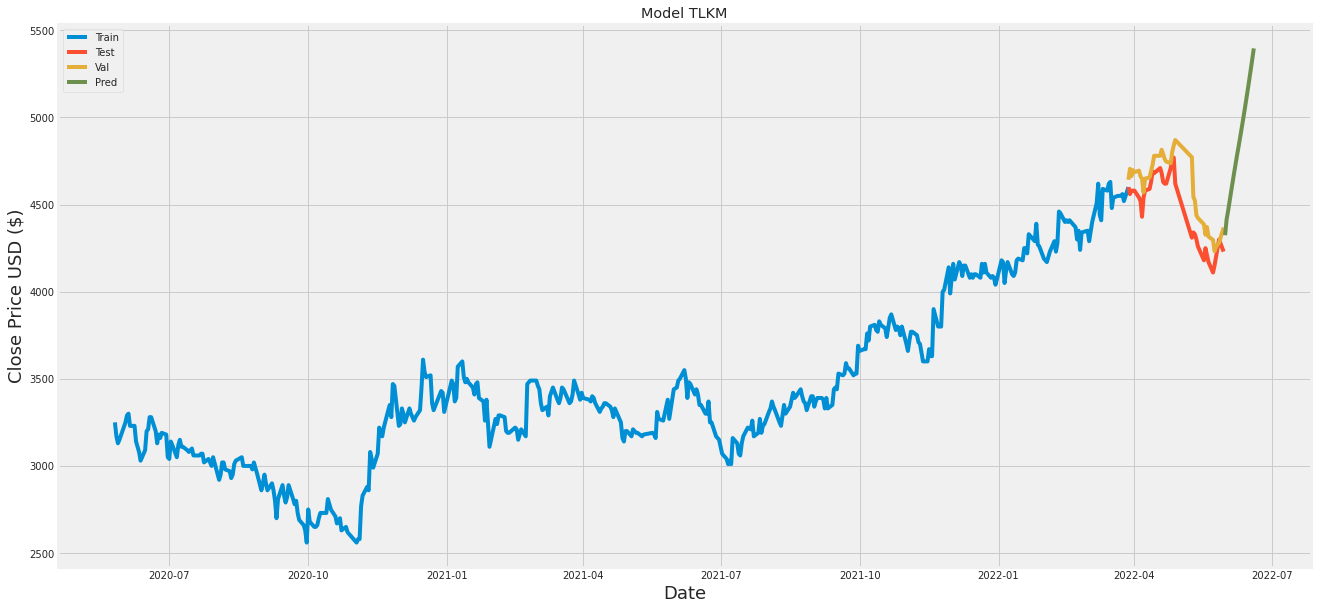

In [66]:
# Plot the data
train = data_graf[:training_data_len+1].copy()
train = train[:]
valid2 = data_graf[training_data_len:]
prediction_graf=valid[['Predictions']]


# Visualize the data
plt.figure(figsize=(20,10))
plt.title('Model '+ pil_stock)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid2[valid2['Close'].notna()]['Close'][:] )
plt.plot(prediction_graf[prediction_graf.index<= end ])  #'2022-05-27'])
plt.plot(prediction_graf[prediction_graf.index>=end])

plt.legend(['Train', 'Test', 'Val','Pred'], loc='best')  #'lower right')

plt.show()

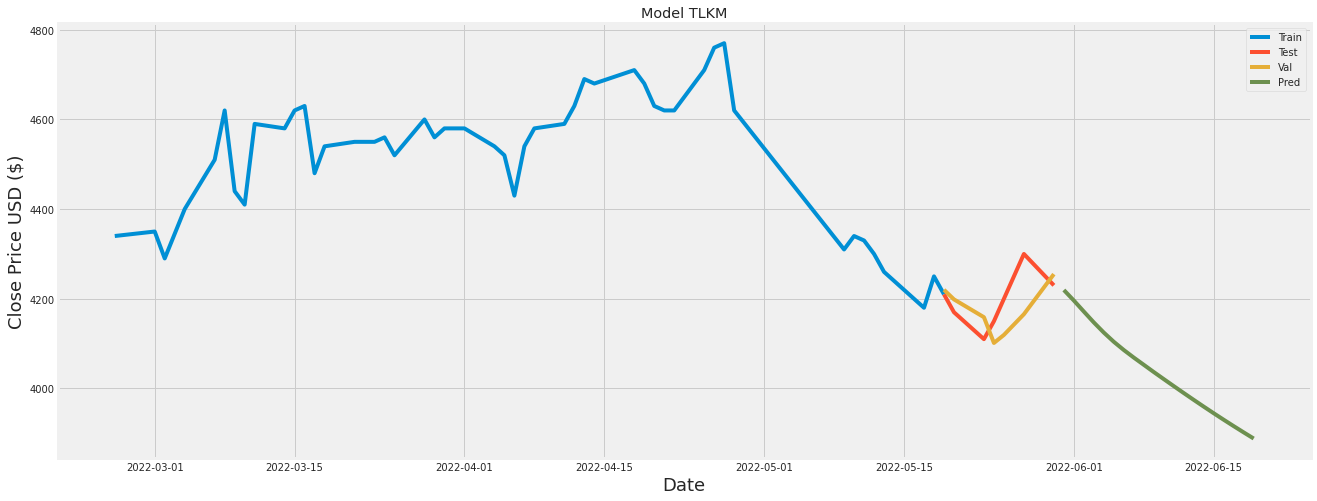

In [59]:
# Plot the data
train = data_graf[:training_data_len+1].copy()
train = train[-50:]
valid2 = data_graf[training_data_len:]
prediction_graf=valid[['Predictions']]


# Visualize the data
plt.figure(figsize=(20,8))
plt.title('Model '+ pil_stock)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid2[valid2['Close'].notna()]['Close'][:] )
plt.plot(prediction_graf[prediction_graf.index<= end ])  #'2022-05-27'])
plt.plot(prediction_graf[prediction_graf.index>=end])

plt.legend(['Train', 'Test', 'Val','Pred'], loc='best')  #'lower right')

plt.show()